In [1]:
# !pip install pytorch-lightning
# !pip install transformers
# !pip install vncorenlp

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
!nvidia-smi

Mon Jul  4 09:25:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   25C    P8     1W / 250W |   4728MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
|  0%   

In [4]:
# !kill -9 3980682

In [5]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import re
import pytorch_lightning as pl
from torchvision import transforms as T
from sklearn.model_selection import train_test_split

train_ratio = 0.8

/home/nghiatl/anaconda3/envs/AI_DA/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import random

# SEED_VALUE = random.randint(0,100)
SEED_VALUE = 66
# print(SEED_VALUE)
random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)
torch.cuda.manual_seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [7]:
# %cd /content/drive/MyDrive/Colab Notebooks/Multimodal

In [8]:
!ls
data_zip_file = './local1_folder.zip'
# data_zip_file2 = './local1_folder_temp.zip'

csv_file2 = './OUTPUT/Comment_22.csv'
csv_file3 = './OUTPUT/Comment_23.csv'
csv_file4 = './OUTPUT/Comment_24.csv'
csv_file5 = './OUTPUT/Comment_25.csv'

csv_file = './OUTPUT/Comment.csv'

archive.zip
Attetion-Multimodal-Bin2.ipynb
Attetion-Multimodal-Bin2-Moredata-Copy1.ipynb
Attetion-Multimodal-Bin2-Moredata.ipynb
Attetion-Multimodal-Bin.ipynb
Attetion-Multimodal-Copy1.ipynb
Attetion-Multimodal-copy2-Copy1.ipynb
Attetion-Multimodal-copy2.ipynb
Attetion-Multimodal.ipynb
Attetion-Multimodal-LateFusion-Copy1.ipynb
Attetion-Multimodal-LateFusion.ipynb
Attetion-Multimodal-seed7.ipynb
Attetion-Multimodal-Soccer.ipynb
CNN.ipynb
Inception-Attetion-Copy1.ipynb
Inception-Attetion-Copy2.ipynb
Inception-Attetion.ipynb
Inception.ipynb
Inception-VotingMultimodal.ipynb
local1_folder_temp.zip
local1_folder.zip
Multimodal_newmodel.ipynb
Multimodal_newmodel-weight.ipynb
my_checkpoint_attention_f1_latefusion.pth.tar
my_checkpoint_attention_f1_latefusion_seed_0.pth.tar
my_checkpoint_attention_f1_latefusion_seed_149.pth.tar
my_checkpoint_attention_f1_latefusion_seed_52.pth.tar
my_checkpoint_attention_f1_latefusion_seed_65.pth.tar
my_checkpoint_attention_f1_latefusion_seed_66.pth.tar
my_che

In [9]:
!nvidia-smi

Sat Jul  2 20:49:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   53C    P2    45W / 250W |   3428MiB / 11019MiB |     19%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
| 34%   

# Data preprocessing

## Image data

In [10]:
data_zip = zipfile.ZipFile(data_zip_file)

In [11]:
len(data_zip.namelist())

58766

In [12]:
'local1_folder-1/foody-fukunohana-hanoi-japanese-retstaurant-970-637197316556573205.jpg' in data_zip.namelist()

True

local1_folder-1/foody-fukunohana-hanoi-japanese-retstaurant-970-637197316556573205.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x734 at 0x7F16FEA42AA0>
(734, 800, 3)


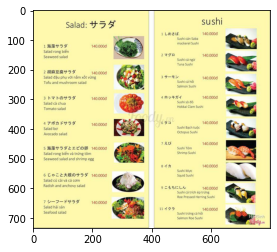

In [13]:
img_path = data_zip.namelist()[1]
print(img_path)
img = Image.open(data_zip.open(img_path))
print(img)
print(np.asarray(img).shape)
plt.imshow(img)

In [14]:
# ### Scale image to [0,1]
# trans = T.ToTensor()
# trans(img).shape

## CSV data

In [15]:
data_df1 = pd.read_csv(csv_file)
data_df2 = pd.read_csv(csv_file2)
data_df3 = pd.read_csv(csv_file3)
data_df4 = pd.read_csv(csv_file4)
data_df5 = pd.read_csv(csv_file5)


data_df1[['Comment', 'Rating']].head()

Comment  Rating
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...     5.8
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...     9.0
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...     9.4
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...     4.6
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...     1.0

In [16]:
data_df4.shape

(3093, 11)

In [17]:
data_df = pd.concat([data_df1,data_df2,data_df3,data_df4, data_df5], ignore_index = True)

In [18]:
data_df.shape

(14174, 11)

In [19]:
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)

In [20]:
data_df.isnull().sum()

RevId                   0
UserId                  0
ResId                   0
Comment                 0
image_urls              0
Food_score_cmt          0
Services_score_cmt      0
Atmosphere_score_cmt    0
Position_score_cmt      0
Price_score_cmt         0
Rating                  0
dtype: int64

In [21]:
## Add more data
data_df.rename(columns={"Rating":"score"}, inplace=True)
data_df.head()

RevId    UserId   ResId  \
0  3648046   8920424  965165   
1  3695359  18558601  965165   
2  3695487  13885433  965165   
3  4256913  11400976  965165   
4  4246644    525112  965165   

                                             Comment  \
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...   
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...   
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...   
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...   
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...   

                                          image_urls  Food_score_cmt  \
0  https://images.foody.vn/res/g97/965165/s800/fo...             5.0   
1  https://images.foody.vn/res/g97/965165/s800/fo...            10.0   
2  https://images.foody.vn/res/g97/965165/s800/fo...            10.0   
3  https://images.foody.vn/res/g97/965165/s800/fo...             1.0   
4  https://images.foody.vn/res/g97/965165/s800/fo...             1.0   

   Services_score_cmt  Atmosphere_score_cmt  Position_score_cmt  \
0                 9.0                   5.0                 5.0   
1                10.0                   9.0                 8.0   
2                10.0                   9.0                 8.0   
3                 5.0                   5.0                 6.0   
4                 1.0                   1.0                 1.0   

   Price_score_cmt  score  
0              5.0    5.8  
1              8.0    9.0  
2             10.0    9.4  
3              6.0    4.6  
4              1.0    1.0

In [22]:
data_df['image_urls'][0]

'https://images.foody.vn/res/g97/965165/s800/foody-doi-sun-pate-shop-online-389-637116772226077520.jpg,https://images.foody.vn/res/g97/965165/s800/foody-doi-sun-pate-shop-online-427-637116772199356351.jpg'

In [23]:
# ## Calculate score
# data_df['score'] = data_df.apply(lambda x: (x['Food_score_cmt']+x['Services_score_cmt']+x['Atmosphere_score_cmt']+x['Position_score_cmt']+x['Price_score_cmt'])/5, axis = 1)
data_df[(data_df['score'] >= 8) & (data_df['score'] <= 8)][['Comment','score']].sort_values(by=['score'])

Comment  score
8      Gi·ªØa c√°i th·ªùi ti·∫øt HN s·ªõm tr∆∞a m∆∞a n·∫Øng th·∫•t t...    8.0
9677   S√°ng n√†o m√¨nh cx ph·∫£i ƒÉn ph·ªü ·ªü ƒë√¢y ms ch·ªãu ƒëc ...    8.0
9701   H√†ng x√¥i t·∫•p n·∫≠p ng∆∞·ªùi gh√© ƒÉn & mua mang ƒëi, n...    8.0
9705   Qu√°n ch√® nh·ªè nh·ªè, ƒë·ªëi di·ªán bakery Tati. C√¥ ch·ªß...    8.0
9713   ‚ù§ V·ªã tr√≠ : h√†ng n√†y m·ªõi m·ªü d·∫°o g·∫ßn ƒë√¢y. N·∫±m ng...    8.0
...                                                  ...    ...
4892   * m√πa d·ªãch ƒÉn g√¨ ??ü§îü§î\nƒêang m√πa d·ªãch th·∫ø n√†y c...    8.0
4907                Su·∫•t ƒë·∫∑c bi·ªát c∆°m g√† + s∆∞·ªùn ship Now    8.0
4955   Ch√® s·∫ßu ch√≠nh h√£ng n√® c·∫£ nh√† üòª vi√™m h·ªçng m√† v·∫´...    8.0
5034   Nh√¢n ng√†y xe bus h·ªèng ƒë√∫ng qu√°n ding tea, m√¨nh...    8.0
14161  V√¥ t√¨nh th·∫•y qu√°n ·ªü ngay m·∫∑t ƒë∆∞·ªùng, s·∫°ch s·∫Ω n·ªï...    8.0

[860 rows x 2 columns]

In [24]:
data_df['Comment'][8]

'Gi·ªØa c√°i th·ªùi ti·∫øt HN s·ªõm tr∆∞a m∆∞a n·∫Øng th·∫•t th∆∞·ªùng, t·ªëi ph·∫ßn ph·∫≠t gi√≥ nh∆∞ n√†y th√¨ vi·ªác ng·ªìi nh√¢m nh√¢m nhi nhi em caramen hoa qu·∫£ n√†y l√† 1 ƒëi·ªÅu th·∫≠t tuy·ªát - th∆°m th∆°m ng·∫≠y ng·∫≠y c·ªßa caramen, v·ªã thanh m√°t c·ªßa c√°c lo·∫°i hoa qu·∫£: d∆∞a h·∫•u, xo√†i, thanh long, m√≠t....ƒë∆∞·ª£c k·∫øt h·ª£p l·∫°i v·ªõi nhau r·∫•t th√∫ v·ªã, c·ªëc c√≤n r·∫•t l√† ƒë·∫ßy ƒë·∫∑n n·ªØa ch·ª©. C∆° m√† anh ch·ªã ch·ªß qu√°n l√†m ngon qu√° ƒëi, c·ª© b·ªã nghi·ªán √Ω, m·ªói ng√†y s·∫Ω n·∫øm 1 v·ªã: s·ªØa chua th·∫°ch l√° n·∫øp n√®, sc hoa qu·∫£, ch√® khoai d·∫ªo n√®.....chu choa v.v.....v√¢n v√¢n v√† m√¢y m√¢y...'

In [25]:
## label data
def label_comment(x):
  if x['score'] >= 8:
    return 1
  elif (x['score'] >= 6) & (x['score'] < 8):
    return 2
  else:
    return 0
data_df['label'] = data_df.apply(label_comment, axis=1)

In [26]:
data_df = data_df[data_df['label'] != 2]

1    6953
0    3023
Name: label, dtype: int64


<AxesSubplot:>

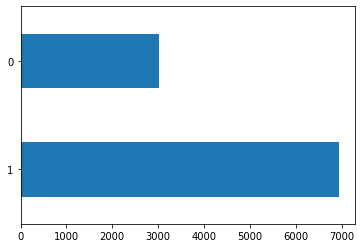

In [27]:
print(data_df['label'].value_counts())
data_df['label'].value_counts().plot(kind='barh')

In [28]:
data_df[['Comment','label', 'score']].head()

Comment  label  score
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...      0    5.8
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...      1    9.0
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...      1    9.4
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...      0    4.6
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...      0    1.0

In [29]:
data_df = data_df.drop(['Food_score_cmt','Services_score_cmt','Atmosphere_score_cmt','Position_score_cmt','Price_score_cmt'],axis=1)
data_df.head()

RevId    UserId   ResId  \
0  3648046   8920424  965165   
1  3695359  18558601  965165   
2  3695487  13885433  965165   
3  4256913  11400976  965165   
4  4246644    525112  965165   

                                             Comment  \
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...   
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...   
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...   
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...   
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...   

                                          image_urls  score  label  
0  https://images.foody.vn/res/g97/965165/s800/fo...    5.8      0  
1  https://images.foody.vn/res/g97/965165/s800/fo...    9.0      1  
2  https://images.foody.vn/res/g97/965165/s800/fo...    9.4      1  
3  https://images.foody.vn/res/g97/965165/s800/fo...    4.6      0  
4  https://images.foody.vn/res/g97/965165/s800/fo...    1.0      0

In [30]:
def preprocess_imgpath(df):
    img_p = []
    for path in df['image_urls'].split(","):
        img_path = 'local1_folder-1/' + path.split('/')[-1]
        if img_path in data_zip.namelist():
            img_p.append(img_path)
    if len(img_p) > 0:
        return ','.join(img_p)
    return None

In [31]:
data_df['image_urls'] = data_df.apply(preprocess_imgpath, axis=1)

In [32]:
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)
data_df.isnull().sum()

RevId         0
UserId        0
ResId         0
Comment       0
image_urls    0
score         0
label         0
dtype: int64

1    6952
0    3023
Name: label, dtype: int64


<AxesSubplot:>

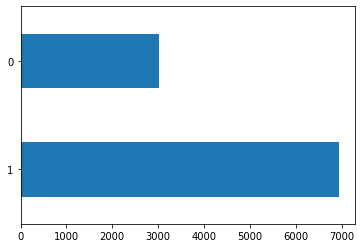

In [33]:
print(data_df['label'].value_counts())
data_df['label'].value_counts().plot(kind='barh')

In [34]:
def loaddicchar():
    dic = {}
    char1252 = 'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|ƒë|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£'.split(
        '|')
    charutf8 = "√†|√°|·∫£|√£|·∫°|·∫ß|·∫•|·∫©|·∫´|·∫≠|·∫±|·∫Ø|·∫≥|·∫µ|·∫∑|√®|√©|·∫ª|·∫Ω|·∫π|·ªÅ|·∫ø|·ªÉ|·ªÖ|·ªá|ƒë|√¨|√≠|·ªâ|ƒ©|·ªã|√≤|√≥|·ªè|√µ|·ªç|·ªì|·ªë|·ªï|·ªó|·ªô|·ªù|·ªõ|·ªü|·ª°|·ª£|√π|√∫|·ªß|≈©|·ª•|·ª´|·ª©|·ª≠|·ªØ|·ª±|·ª≥|√Ω|·ª∑|·ªπ|·ªµ|√Ä|√Å|·∫¢|√É|·∫†|·∫¶|·∫§|·∫®|·∫™|·∫¨|·∫∞|·∫Æ|·∫≤|·∫¥|·∫∂|√à|√â|·∫∫|·∫º|·∫∏|·ªÄ|·∫æ|·ªÇ|·ªÑ|·ªÜ|√å|√ç|·ªà|ƒ®|·ªä|√í|√ì|·ªé|√ï|·ªå|·ªí|·ªê|·ªî|·ªñ|·ªò|·ªú|·ªö|·ªû|·ª†|·ª¢|√ô|√ö|·ª¶|≈®|·ª§|·ª™|·ª®|·ª¨|·ªÆ|·ª∞|·ª≤|√ù|·ª∂|·ª∏|·ª¥".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# ƒê∆∞a to√†n b·ªô d·ªØ li·ªáu qua h√†m n√†y ƒë·ªÉ chu·∫©n h√≥a l·∫°i
def convert_unicode(txt):
    return re.sub(
        r'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|ƒë|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£',
        lambda x: dicchar[x.group()], txt)

In [35]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("./vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

uniChars = "√†√°·∫£√£·∫°√¢·∫ß·∫•·∫©·∫´·∫≠ƒÉ·∫±·∫Ø·∫≥·∫µ·∫∑√®√©·∫ª·∫Ω·∫π√™·ªÅ·∫ø·ªÉ·ªÖ·ªáƒë√¨√≠·ªâƒ©·ªã√≤√≥·ªè√µ·ªç√¥·ªì·ªë·ªï·ªó·ªô∆°·ªù·ªõ·ªü·ª°·ª£√π√∫·ªß≈©·ª•∆∞·ª´·ª©·ª≠·ªØ·ª±·ª≥√Ω·ª∑·ªπ·ªµ√Ä√Å·∫¢√É·∫†√Ç·∫¶·∫§·∫®·∫™·∫¨ƒÇ·∫∞·∫Æ·∫≤·∫¥·∫∂√à√â·∫∫·∫º·∫∏√ä·ªÄ·∫æ·ªÇ·ªÑ·ªÜƒê√å√ç·ªàƒ®·ªä√í√ì·ªé√ï·ªå√î·ªí·ªê·ªî·ªñ·ªò∆†·ªú·ªö·ªû·ª†·ª¢√ô√ö·ª¶≈®·ª§∆Ø·ª™·ª®·ª¨·ªÆ·ª∞·ª≤√ù·ª∂·ª∏·ª¥√ÇƒÇƒê√î∆†∆Ø"
punc_re = '[^\w'+uniChars+']'
def preprocess_text(sen):
  ##Unicode reform
  assert isinstance(sen, str), 'Not String'
  sen = convert_unicode(sen)
  ##Remove punctuation
  sen = re.sub(punc_re,' ', sen)
  ##Remove multiple space
  sen = re.sub('\s+',' ', sen)
  ##Lower
  sen = sen.lower()
  ##Segment
  seg = rdrsegmenter.tokenize(sen)
  if len(seg) == 0:
    sen = ' '
  else: 
    sen = ' '.join(seg[0])
  return sen
# vec_pre = np.vectorize(preprocess_text)
# print(vec_pre((data_df.iloc[3,3])))
data_df['preprocess_comment'] = data_df.apply(lambda x: preprocess_text(x['Comment']), axis = 1)

In [36]:
data_df[data_df['score'] < 6][50:60]
data_df.iloc[170]['preprocess_comment']
# data_df.iloc[193]['image_urls']

'ph·∫£i n√≥i qu√°n r·∫•t ƒë√¥ng ƒë√∫ng ƒëc qu·∫£ng_c√°o tr√™n foody b·∫°n m khen ngon r·ªß c·∫£ nh√≥m ƒëi ƒÉn haizzz nh√≥m m g·ªçi n·ªìi l·∫©u sukiyaki t√≠nh ra r·∫ª 125k ng th√¥i nh∆∞ng √¥i chi·ªÅu t c·∫£m_gi√°c n√¥n_nao ·ªü b·ª•ng r·ªìi n∆∞·ªõc_b·ªçt tr√†o ng∆∞·ª£c l√™n ƒëo√°n ƒÉn g√¨ ng·ªô_ƒë·ªôc r·ªìi nghƒ©_l·∫°i t·ª´ tr∆∞a t·ªõi gi·ªù ch·ªâ ƒëi ƒÉn l·∫©u sukiyaki chi·ªÅu v·ªÅ u·ªëng c·ªëc n∆∞·ªõc_l·ªçc th√¥i m√† m√¨nh v·∫´n u·ªëng h√†ng ng√†y ch·ª© ko u·ªëng g√¨ ƒÉn g√¨ n·ªØa c·∫£ nghi·ªám ra th·∫ø_l√† m√≥c c·ªï_h·ªçng phun ra h·∫øt to√†n m·ª≥ v·ªõi rau ƒÉn tr∆∞a nay phun xong tho·∫£i_m√°i h·∫≥n v√† m√¨nh ƒëo√°n rau nh√†_h√†ng nh·∫≠p ko s·∫°ch r·ªìi b·ª•ng_d·∫° ai y·∫øu th√¨ t·ªët nh·∫•t kh√¥ng n√™n ƒÉn_·ªü ƒë√¢y p s m l√† ƒë·ª©a kho·∫ª ko b·ªã b·ªánh g√¨ kh√¥ng b·ªã b·ªánh v·ªÅ h·ªá ti√™u_ho√° kh√¥ng b·ªã d·∫°_d√†y g√¨ c·∫£ m√†_c√≤n b·ªã ng·ªô_ƒë·ªôc th·∫ø n√™n ae l∆∞u_√Ω khi ƒëi ƒÉn ngo√†i'

In [37]:
data_df.iloc[193]['preprocess_comment']
data_df.iloc[193]['image_urls']

'local1_folder-1/foody-che-thuy-van-tran-quoc-hoan-922-636107306733723116.jpg'

In [38]:
data_df[data_df['preprocess_comment']==" "].shape
# data_df.drop(data_df[data_df['preprocess_comment']==" "].index, inplace = True)

(9, 8)

In [39]:
data_df = data_df.reset_index()
data_df['preprocess_comment'][4187:4191]

4187    v·ªã_tr√≠ ·ªü m·∫∑t ƒë∆∞·ªùng nh∆∞ng ·ªü c·∫°nh qu√°n m√¨ cay to...
4188    th·∫≠t tuy·ªát_c√∫ m√®o lu√¥n m·ªói c·ªëc hoa_qu·∫£ d·∫ßm ·ªü ƒë...
4189    m√¨nh ƒë√£ ƒÉn_·ªü ƒë·ªãa_ƒëi·ªÉm 211 ch√πa l√°ng ƒë∆∞·ª£c h∆°n 1...
4190    nghe m·ªçi ng∆∞·ªùi khen qu√°n n√†y d·ªØ l√©m n√™n h√¥m_na...
Name: preprocess_comment, dtype: object

In [40]:
a = data_df['preprocess_comment'].str.split()
a = a.apply(lambda x: len(x))
a[a==1]

314     1
415     1
744     1
1011    1
1077    1
1543    1
1779    1
1808    1
1888    1
2302    1
2337    1
2528    1
2836    1
2873    1
2976    1
3489    1
3643    1
4328    1
4409    1
4645    1
5242    1
5564    1
5976    1
6341    1
6487    1
6748    1
7554    1
7603    1
8684    1
8881    1
9377    1
9523    1
Name: preprocess_comment, dtype: int64

In [41]:
a

0        56
1        43
2        38
3        34
4        74
       ... 
9970     42
9971     48
9972    107
9973    185
9974     17
Name: preprocess_comment, Length: 9975, dtype: int64

In [42]:
data_df['Comment'][195]

'S·ªØa chua m√≠t + tr√† ƒë√†o ngon, caramen trong s·ªØa chua ƒÉn c≈©ng ok, gi√° v·ª´a ph·∫£i. Qu√°n s·∫°ch s·∫Ω, nh√¢n vi√™n ph·ª•c v·ª• t·ªët. S·∫Ω quay l·∫°i.'

<AxesSubplot:>

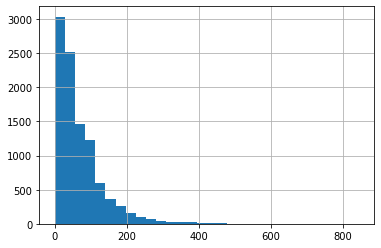

In [43]:
seq_len = [len(i.split()) for i in data_df['preprocess_comment']]

pd.Series(seq_len).hist(bins = 30)

In [44]:
pd.DataFrame(seq_len).mean()

0    69.63188
dtype: float64

<AxesSubplot:>

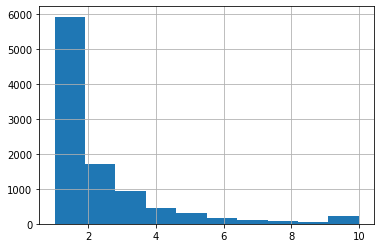

In [45]:
img_len = [len(i.split(',')) for i in data_df['image_urls']]

pd.Series(img_len).hist(bins = 10)

In [46]:
img_len = pd.DataFrame(img_len)
img_len.value_counts()

1     5930
2     1699
3      940
4      454
5      320
10     210
6      178
7      121
8       75
9       48
dtype: int64

In [47]:
img_len.mean()

0    2.066266
dtype: float64

# Load BPE, Vocab of PhoBERT and DataGen

In [48]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [49]:
def collate_batch(batch):
  input_ids = []
  attention_masks = []
  imgs = []
  img_len = []
  labels = []
  for bt in batch:
    input_ids.append(bt[0]['input_ids'][0])
    attention_masks.append(bt[0]['attention_mask'][0])
    imgs.extend(bt[1])
    img_len.append(len(bt[1]))
    labels.append(bt[2])

  bert_tokens = torch.stack(input_ids)
  attention_masks = torch.stack(attention_masks)
  imgs_torch = torch.stack(imgs)
  labels = torch.LongTensor(labels)

  return  { 'input_ids': bert_tokens , 'attention_mask':attention_masks } , imgs_torch, img_len, labels

In [50]:
trans = T.ToTensor()
RANDOM_SEED = 0
MAX_LEN = 150


class SentimentData(Dataset):
  def __init__(self, data, transform = None):
    self.df = data.reset_index(drop=True)
    self.transform = transform
  def __len__(self):
    # print('Size',len(self.df))
    return len(self.df)  
  def __getitem__(self,idx):
    text = self.df["preprocess_comment"][idx]
    text = tokenizer(text, padding='max_length', truncation=True, max_length = MAX_LEN, return_tensors="pt")

    img_list = []
    for path in self.df['image_urls'][idx].split(","):
#       img_path = '/' + path.split('/')[-1]
      img = Image.open(data_zip.open(path))
      if self.transform is not None:
        img = self.transform(img)
      img_list.append(img)

    # print(text.shape)
    # text = ' '.join(text[0])
    label = self.df["label"][idx]

    return (text, img_list, label)

class SentimentDataModule(pl.LightningDataModule):
    
  def __init__(self, data, batch_size: int = 8, test_size = 0.2):
      super().__init__()
      self.test_size = test_size
      self.data = data
      self.batch_size = batch_size
      self.train_data = ''
      self.val_data = ''
      self.test_data = ''

  def prepare_data(self):
      self.train_data, self.val_data = train_test_split(self.data, test_size = self.test_size, random_state=RANDOM_SEED, stratify = self.data['label'])
      self.test_data, self.val_data = train_test_split(self.val_data,test_size = 0.5, random_state=RANDOM_SEED, stratify = self.val_data['label'])
      print(self.data['label'].value_counts())
      print(self.train_data['label'].value_counts())
      print(self.val_data['label'].value_counts())
      print(self.test_data['label'].value_counts())

  def setup(self, stage = None):
      train_transform = T.Compose([
       T.Resize([299, 299]), T.RandomHorizontalFlip(), T.RandomRotation(10),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
      ])
      val_transform = T.Compose([
        T.Resize([299, 299]), T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
      ])
      test_transform = T.Compose([
        T.Resize([299, 299]), T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
      ])
      self.train = SentimentData(self.train_data, train_transform)
      self.val = SentimentData(self.val_data, val_transform)
      self.test = SentimentData(self.test_data, test_transform)


  def train_dataloader(self):
      return DataLoader(self.train, batch_size=self.batch_size, shuffle=True, collate_fn=collate_batch)

  def val_dataloader(self):
      return DataLoader(self.val, batch_size=self.batch_size, collate_fn=collate_batch)

  def test_dataloader(self):
      return DataLoader(self.test, batch_size=self.batch_size, collate_fn=collate_batch)

  

In [51]:
# Do some Test with data
if __name__ == "__main__":
  dm = SentimentDataModule(data_df)
  dm.prepare_data()
  dm.setup()
  for step, bat in enumerate(dm.train_dataloader()):
    if step > 0: break
    print(step)
    print(bat[0]['input_ids'].shape)
    print(bat[1].shape)
    print(sum(bat[2]))
    print(len(bat[3]))

1    6952
0    3023
Name: label, dtype: int64
1    5562
0    2418
Name: label, dtype: int64
1    695
0    303
Name: label, dtype: int64
1    695
0    302
Name: label, dtype: int64
0
torch.Size([8, 150])
torch.Size([11, 3, 299, 299])
11
8


In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cuda



# PhoBERT

In [53]:
from transformers import RobertaModel, RobertaConfig, AdamW, AutoModel
from transformers import RobertaForSequenceClassification

pretrained_config_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/config.json"
pretrained_model_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/model.bin"

In [54]:
class Bert_Lstm(nn.Module):
  def __init__(self):
    super().__init__()
    self.PhoBERT = AutoModel.from_pretrained("vinai/phobert-base")

    self.lstm = nn.LSTM(input_size=768, hidden_size=128, num_layers= 1, batch_first=True)
  
  def forward(self, texts):
    bert_out = self.PhoBERT(texts['input_ids'],token_type_ids=None, attention_mask = texts['attention_mask'])
    bert_out = bert_out['last_hidden_state']
    out, _ = self.lstm(bert_out)
    feature_extract = out[:,-1,:].contiguous()

    return feature_extract

In [55]:
# # This time, the output's 2nd dimension is 3, indicating that there were 3 outputs given by the LSTM. 
# # This corresponds to the length of our input sequence. 
# # For the use cases where we'll need an output at every time step (many-to-many), such as Text Generation, the output of each time step can be extracted directly from the 2nd dimension and fed into a fully connected layer. 
# # For text classification tasks (many-to-one), such as Sentiment Analysis, the last output can be taken to be fed into a classifier.

# pho_test = Bert_Lstm()
# pho_test
# # oooo = pho_test('iiii')
# for name, child in pho_test.named_children():
#   print(name)

# InceptionV3

In [56]:
from torchvision.models import inception_v3

In [57]:
# class Inception(nn.Module):
#   def __init__(self):
#     super(Inception,self).__init__()
#     self.incept = inception_v3(pretrained = True,progress = True,aux_logits= False,transform_input = True)
#     self.incept_sequen = nn.Sequential(*list(self.incept.children())[:-3])
#     self.avgpool = nn.AdaptiveAvgPool2d((1,1))
#     self.drop = nn.Dropout(p=0.4)
#     self.flat = nn.Linear(2048, 128)

#   def process(self, feature, len_img_list):
#     max_fea = torch.zeros(len(len_img_list), feature.shape[-1]).to(device)
#     start = 0
#     for idx, num in enumerate(len_img_list):
#       max_fea[idx] = feature[start:start+num].max(0)[0]
#       start += num

#     return max_fea
  

#   def forward(self, image, len_img_list):
#     feature = self.incept_sequen(image)
#     feature = self.avgpool(feature)
#     feature = self.drop(feature)
#     feature = feature.reshape(-1, 2048)
# #     feature = self.drop(feature)
#     # out = self.avgpool(feature)
#     # print(out.shape)
#     # out = out.contiguous().view(-1, 2048)
#     out = self.process(feature, len_img_list)
#     img_fea = self.flat(out)

#     return img_fea


In [58]:
# img_fea = torch.rand(4,128).to(device)
# img_fea.shape
# text_fea = torch.rand(2,128).to(device)
# len_img_list=[2,2]

In [59]:
# def attention(image_fea, text_fea, len_img_list):
#     m = nn.Softmax(dim=0)
#     scale = 1.0/np.sqrt(128)
# #     context_vector = torch.mul(text_fea, m(torch.matmul(text_fea, img_fea.permute(1,0))))
#     context_vector = torch.zeros(len(len_img_list), 128).to(device)
#     start_term = 0
#     for i in range(len(len_img_list)):
#         context_vector[i] = torch.mul(text_fea[i], m(torch.matmul(image_fea[start_term: start_term + len_img_list[i]], text_fea[i].contiguous().view(128,-1))*scale)).sum(dim=0)
#         start_term += len_img_list[i]
#     return context_vector

In [60]:
# m = nn.Softmax(dim=0)
# scale = 1.0/np.sqrt(128)
# m(torch.matmul(img_fea[0: 2], text_fea[0].contiguous().view(128,-1))*scale)

In [61]:
# print(img_fea[0: 2].shape)
# img_fea[0: 2]

In [62]:
# torch.mul(img_fea[0:2], m(torch.matmul(img_fea[0: 2], text_fea[0].contiguous().view(128,-1))*scale))

In [63]:
# torch.matmul(img_fea[0: 2], text_fea[0].contiguous().view(128,-1))

In [64]:
# context = attention(img_fea, text_fea, len_img_list)
# context

In [65]:
# context.shape

In [66]:
class Inception(nn.Module):
  def __init__(self):
    super(Inception,self).__init__()
    self.incept = inception_v3(pretrained = True,progress = True,aux_logits= False,transform_input = True)
    self.incept_sequen = nn.Sequential(*list(self.incept.children())[:-3])
    self.avgpool = nn.AdaptiveMaxPool2d((1,1))
    self.drop = nn.Dropout(p=0.4)
#     self.flat = nn.Linear(2048, 128)
    self.ffn = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
#             nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(128, 2),
        )
  
  def forward(self, image, len_img_list):
    feature = self.incept_sequen(image)
    feature = self.avgpool(feature)
    feature = self.drop(feature)

    img_fea = feature.reshape(-1, 2048)
    out = self.ffn(img_fea)

    
    return out


In [67]:
# inc = inception_v3(pretrained = True,progress = True,aux_logits= False,transform_input = False)
# inc

In [68]:
# incept_sequen = nn.Sequential(*list(inc.children())[:-3])
# incept_sequen

In [69]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from tensorflow.keras.models import Model

# basemodel = InceptionV3(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(299, 299, 3)))
# x = basemodel.output
# # t = layers.AveragePooling2D(pool_size=(8, 8), name='AVG_Pooling')(x)
# model_cnn = Model(basemodel.input, x)

# basemodel.summary()

In [70]:
# ou = model_cnn(np.random.rand(1,299,299,3))

In [71]:
# ou.shape

# Multimodal (no pytorch-lightning)

In [72]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter('runs/mrtrongmodel')

class LRScheduler():
    def __init__(
        self, optimizer, patience=1, min_lr=1e-6, factor=0.1
    ):
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
                self.optimizer,
                mode='max',
                patience=self.patience,
                factor=self.factor,
                min_lr=self.min_lr,
                verbose=True
            )
    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

class EarlyStopping():
    def __init__(self, patience=8, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [73]:
class Concatmodal(nn.Module):
  def __init__(self):
    super(Concatmodal,self).__init__()
    # self.loss_module = nn.CrossEntropyLoss()
    self.BERT = Bert_Lstm()
    self.incept = Inception()
    self.dense = nn.Linear(256,256)
    self.cl = nn.Linear(256,2)
    # self.bpe_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/bpe.codes"
    # self.vocab_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/dict.txt"
    
  def attention(self, image_fea, text_fea, len_img_list):
    m = nn.Softmax(dim=0)
    scale = 1.0/np.sqrt(128)
#     context_vector = torch.mul(text_fea, m(torch.matmul(text_fea, img_fea.permute(1,0))))
    context_vector = torch.zeros(len(len_img_list), 128).to(device)
    start_term = 0
    for i in range(len(len_img_list)):
        context_vector[i] = torch.mul(image_fea[start_term: start_term + len_img_list[i]], m(torch.matmul(image_fea[start_term: start_term + len_img_list[i]], text_fea[i].contiguous().view(128,-1))*scale)).sum(dim=0)
        start_term += len_img_list[i]
    return context_vector
        
  def forward(self, image, inputs, len_img_list, labels=None):
    for key in inputs:
        inputs[key] = inputs[key].to(device)
    image = image.to(device)

    fea1 = self.BERT(inputs)
    fea2 = self.incept(image, len_img_list)
    
    context_vec = self.attention(fea2, fea1,  len_img_list)
    cat = torch.cat((fea1, context_vec), 1)
    out = self.cl(cat)

    return out


In [74]:
def fit(model, dm, criterion, optimizer, epoch):
  running_loss = 0.0
  train_running_loss = 0.0
  # running_correct = 0
  reporting_step = 100
  train_preds = np.array([])
  train_labels = np.array([])

  counter = 0
  # total = 0
  soft_m = nn.Softmax(dim=-1)

  model.train()

  for i, (texts, images, len_img_list, labels) in enumerate(dm.train_dataloader()):
      counter += 1
      labels = labels.to(device)
      optimizer.zero_grad()

      outputs = model(images, texts, len_img_list)
      loss = criterion(outputs, labels)
      output_scores = soft_m(outputs)
      predictions = torch.argmax(output_scores, dim=-1)

      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      train_running_loss += loss.item()
        
      predictions = predictions.cpu().numpy()
      labels = labels.cpu().numpy()
      # _, preds = torch.max(outputs.data, 1)
      train_preds = np.concatenate((train_preds, predictions), axis=0)
      train_labels = np.concatenate((train_labels, labels), axis=0)

      if i % reporting_step == reporting_step-1:
            print(f"Epoch {epoch} Step {i} ave_loss {running_loss/reporting_step:0.4f}")
            running_loss = 0.0
            
  train_loss = train_running_loss / counter
  reports = classification_report(train_labels, train_preds, output_dict=True)
  print(confusion_matrix(train_labels, train_preds))
  train_ac = classification_report(train_labels, train_preds, output_dict=True)['macro avg']['f1-score']
    
#   writer.add_scalar("Loss/train", train_loss, epoch)
#   writer.add_scalar("macro-f1/train", reports['macro avg']['f1-score'], epoch)
#   writer.add_scalar("Acc/train", train_ac, epoch)


  return train_loss, train_ac

In [75]:
def validation(model, dm, criterion):
  model.eval()
  val_running_loss = 0.0
  val_preds = np.array([])
  val_labels = np.array([])

  soft_m = nn.Softmax(dim=-1)

  counter = 0

  with torch.no_grad():
    for i, (texts, images, len_img_list, labels) in enumerate(dm.val_dataloader()):
        counter += 1
        labels = labels.to(device)

        outputs = model(images, texts, len_img_list)

        loss = criterion(outputs, labels)
        output_scores = soft_m(outputs)
        predictions = torch.argmax(output_scores, dim=-1)
        

        predictions = predictions.cpu().numpy()
        labels = labels.cpu().numpy()
        
        val_running_loss += loss.item()
        val_preds = np.concatenate((val_preds, predictions), axis=0)
        val_labels = np.concatenate((val_labels, labels), axis=0)
    

  val_loss = val_running_loss / counter
  print(classification_report(val_labels, val_preds))
  print(confusion_matrix(val_labels, val_preds))
#   val_ac = accuracy_score(val_labels, val_preds)
  val_ac = classification_report(val_labels, val_preds, output_dict=True)['macro avg']['f1-score']


#   writer.add_scalar("Loss/val", val_loss, epoch)
#   writer.add_scalar("Acc/val", val_ac, epoch)
#   writer.add_scalar("macro-f1/val", reports['macro avg']['f1-score'], epoch)
  
  return val_loss, val_ac


In [76]:

def testing(model, dm):
  model.eval()
  test_running_loss = 0.0
  counter = 0
  test_preds = torch.tensor([], device=device)
  test_labels = torch.tensor([], device = device)

  soft_m = nn.Softmax(dim=-1)
  score_preds = np.empty((0,2))

  with torch.no_grad():
    for i, (texts, images, inputs, labels) in enumerate(dm.test_dataloader()):
        counter += 1
        labels = labels.to(device)

        outputs = model(images, texts, inputs)

        output_scores = soft_m(outputs)
        predictions = torch.argmax(output_scores, dim=-1)
        output_scores = output_scores.cpu().numpy()


        test_preds = torch.cat((test_preds, predictions), dim=0)
        test_labels = torch.cat((test_labels, labels), dim=0)
        score_preds = np.append(score_preds, output_scores, axis=0)


        # loss = criterion(outputs, labels)
        # test_running_loss += loss.item()
    
  test_preds = test_preds.cpu().numpy()
  test_labels = test_labels.cpu().numpy()
       
  print('test', classification_report(test_labels, test_preds))
  print('test_ac', accuracy_score(test_labels, test_preds))
  print('Confusion', confusion_matrix(test_labels, test_preds))
  print('Macro_f1', classification_report(test_labels, test_preds, output_dict=True)['macro avg']['f1-score'])
  
  # test_loss = test_running_loss / counter
  return test_preds, score_preds, test_labels



In [77]:
# (t, i ,l) = next(iter(dm.train_dataloader()))
# mo = Concatmodal()
# ou = mo(i, t)
# print(ou)
# sf = nn.Softmax(dim=-1)
# ou = sf(ou)
# print(ou)
# ou = torch.argmax(ou, dim=-1)
# print(ou)

In [78]:
# testing(mo, dm)

In [79]:
def save_checkpoint(state, filename='my_checkpoint_attention_seed_66_1e-3.pth.tar'):
    print('Saving....'+ filename)
    torch.save(state, filename)

In [80]:
def save_checkpoint1(state, filename='my_checkpoint_attention_seed_66_f1_1e-3.pth.tar'):
    print('Saving....'+ filename)
    torch.save(state, filename)

In [81]:
%ls

archive.zip
Attetion-Multimodal-Bin2.ipynb
Attetion-Multimodal-Bin2-Moredata-Copy1.ipynb
Attetion-Multimodal-Bin2-Moredata.ipynb
Attetion-Multimodal-Bin.ipynb
Attetion-Multimodal-Copy1.ipynb
Attetion-Multimodal-copy2-Copy1.ipynb
Attetion-Multimodal-copy2.ipynb
Attetion-Multimodal.ipynb
Attetion-Multimodal-LateFusion-Copy1.ipynb
Attetion-Multimodal-LateFusion.ipynb
Attetion-Multimodal-seed7.ipynb
Attetion-Multimodal-Soccer.ipynb
CNN.ipynb
Inception-Attetion-Copy1.ipynb
Inception-Attetion-Copy2.ipynb
Inception-Attetion.ipynb
Inception.ipynb
Inception-VotingMultimodal.ipynb
local1_folder_temp.zip
local1_folder.zip
Multimodal_newmodel.ipynb
Multimodal_newmodel-weight.ipynb
my_checkpoint_attention_f1_latefusion.pth.tar
my_checkpoint_attention_f1_latefusion_seed_0.pth.tar
my_checkpoint_attention_f1_latefusion_seed_149.pth.tar
my_checkpoint_attention_f1_latefusion_seed_52.pth.tar
my_checkpoint_attention_f1_latefusion_seed_65.pth.tar
my_checkpoint_attention_f1_latefusion_seed_66.pth.tar
my_che

In [82]:
# model = Concatmodal()
# total_params = sum(p.numel() for p in model.parameters())
# print(f"{total_params:,} total parameters.")
# total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f"{total_trainable_params:,} training parameters.")

In [83]:
def freeze(model):  
  for param in model.BERT.PhoBERT.parameters():
    param.requires_grad = False
  for param in model.incept.incept.parameters():
    param.requires_grad = False
  return model

def unfreeze(model):  
  for param in model.BERT.PhoBERT.parameters():
    param.requires_grad = True
  for param in model.incept.incept.parameters():
    param.requires_grad = True
    # print(param)
  return model

In [84]:
# total_params = sum(p.numel() for p in model.parameters())
# print(f"{total_params:,} total parameters.")
# total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f"{total_trainable_params:,} training parameters.")

In [85]:
# import gc
# del model
# gc.collect()

In [86]:
model = Concatmodal()
model = freeze(model)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [87]:
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

160,473,674 total parameters.
1,640,834 training parameters.


In [88]:
from sklearn.utils.class_weight import compute_class_weight

class_weights=compute_class_weight(class_weight='balanced', classes=np.unique(dm.train_data['label']), y=dm.train_data['label'])
class_weights=torch.tensor(class_weights,dtype=torch.float).to(device)

In [89]:
!nvidia-smi

Sat Jul  2 20:52:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   55C    P2    79W / 250W |   4461MiB / 11019MiB |     15%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
|  0%   

In [90]:
from torch.optim import lr_scheduler

train_loss_list=[]
epoch_list=[]
val_loss_list=[]
val_f1_list=[]
train_f1_list=[]


#define model
model.to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")
# define hyper
# grouped_params = [
#     {"params": [p for n, p in roberta_params], "lr": 1e-5},
#     # {"params": [p for n, p in classifier_params], "lr": 3e-3}
# ]
# optimizer = torch.optim.Adam([
#         {'params': model.BERT.lstm.parameters()},  
#         {'params': model.incept.flat.parameters()}, 
#         {'params': model.incept.avgpool.parameters()},  
#         {'params': model.dense.parameters()},       
#         {'params': model.cl.parameters()},       
#         {'params': model.BERT.PhoBERT.parameters(), 'lr': 1e-5},
#         {'params': model.incept.incept.parameters(), 'lr': 1e-5}
#     ], lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#training
# def training(model, optimizer):
# define hyper
criterion = nn.CrossEntropyLoss(weight=class_weights)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
epochs = 30
lr_scheduler = LRScheduler(optimizer)
early_stopping = EarlyStopping()
min_loss = np.Inf
max_f1 = 0

for epoch in range(epochs):
  print(f"Epoch {epoch} of {epochs}")
  train_epoch_loss, train_ac = fit(
        model, dm, criterion, optimizer, epoch
    )
  val_epoch_loss, val_epoch_ac = validation(
        model, dm, criterion
    )

  lr_scheduler(val_epoch_ac)

  print('Train acc', train_ac)
  print(f"Train Loss: {train_epoch_loss:.4f}")
  print(f'Val Loss: {val_epoch_loss:.4f}')
  print(f'Val Acc: {val_epoch_ac:.4f}')
    
  train_loss_list.append(train_epoch_loss)
  train_f1_list.append(train_ac)
  val_loss_list.append(val_epoch_loss)
  val_f1_list.append(val_epoch_ac)
  epoch_list.append(epoch)
    
  checkpoint ={'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict(), 'epoch': epoch, 'loss':val_epoch_loss }
  if (min_loss >= val_epoch_loss):
      print('Better ver saved')
      min_loss = val_epoch_loss
      save_checkpoint(checkpoint)
        
  if (val_epoch_ac >= max_f1):
      checkpoint ={'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict(), 'epoch': epoch, 'loss': val_epoch_loss, "f1": val_epoch_ac}
      print('Better ver saved')
      max_f1 = val_epoch_ac
      save_checkpoint1(checkpoint)
    
  early_stopping(val_epoch_loss)
  if early_stopping.early_stop:
      break

testing(model, dm)

160,473,674 total parameters.
1,640,834 training parameters.
Epoch 0 of 30
Epoch 0 Step 99 ave_loss 0.6759
Epoch 0 Step 199 ave_loss 0.4639
Epoch 0 Step 299 ave_loss 0.4225
Epoch 0 Step 399 ave_loss 0.4244
Epoch 0 Step 499 ave_loss 0.4513
Epoch 0 Step 599 ave_loss 0.4377
Epoch 0 Step 699 ave_loss 0.4042
Epoch 0 Step 799 ave_loss 0.3680
Epoch 0 Step 899 ave_loss 0.3620
[[1801  617]
 [ 801 4761]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       303
         1.0       0.94      0.93      0.93       695

    accuracy                           0.91       998
   macro avg       0.89      0.89      0.89       998
weighted avg       0.91      0.91      0.91       998

[[261  42]
 [ 51 644]]
Train acc 0.7939568963633582
Train Loss: 0.4308
Val Loss: 0.3165
Val Acc: 0.8907
Better ver saved
Saving....my_checkpoint_attention_seed_66_1e-3.pth.tar
Better ver saved
Saving....my_checkpoint_attention_seed_66_f1_1e-3.pth.tar
Epoch 1 of 30
Epoch 1 St

[[2163  255]
 [ 203 5359]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       303
         1.0       0.94      0.98      0.96       695

    accuracy                           0.94       998
   macro avg       0.94      0.92      0.93       998
weighted avg       0.94      0.94      0.94       998

[[260  43]
 [ 15 680]]
Train acc 0.931641770588193
Train Loss: 0.1931
Val Loss: 0.2339
Val Acc: 0.9294
INFO: Early stopping counter 1 of 8
Epoch 10 of 30
Epoch 10 Step 99 ave_loss 0.1932
Epoch 10 Step 199 ave_loss 0.1808
Epoch 10 Step 299 ave_loss 0.2124
Epoch 10 Step 399 ave_loss 0.2139
Epoch 10 Step 499 ave_loss 0.1987
Epoch 10 Step 599 ave_loss 0.2043
Epoch 10 Step 699 ave_loss 0.2018
Epoch 10 Step 799 ave_loss 0.1650
Epoch 10 Step 899 ave_loss 0.1940
[[2158  260]
 [ 188 5374]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       303
         1.0       0.94      0.98      0.96       6

(array([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        0., 

In [91]:
# training(model, optimizer)
print(next(model.parameters()).device)

cuda:0


In [92]:
def show_graph(train_accu, eval_accu, epoch_list, type='F1'):
    plt.plot(epoch_list,train_accu ,'-o')
    plt.plot(epoch_list,eval_accu,'-o')
    plt.xlabel('epoch')
    plt.ylabel(type)
    plt.legend(['Train','Valid'])
    plt.title('Train vs Valid '+type)

    plt.show()

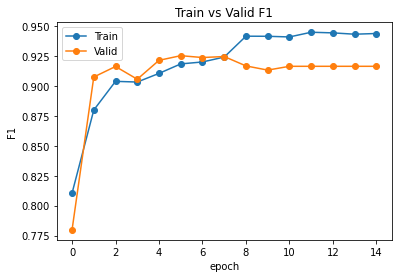

In [92]:
# freeze inception seed 84 1e-3 maxpool drop 0.5
show_graph(train_f1_list, val_f1_list, epoch_list)

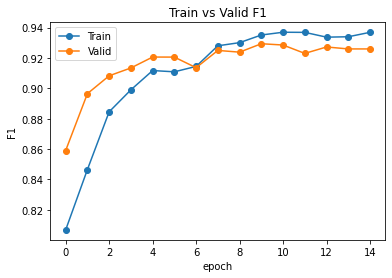

In [91]:
# freeze inception seed 0 1e-3 maxpool drop 0.2
show_graph(train_f1_list, val_f1_list, epoch_list)

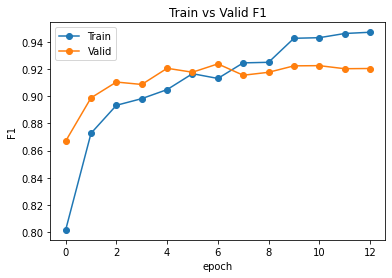

In [90]:
# freeze inception seed 25 1e-3 maxpool drop 0.2
show_graph(train_f1_list, val_f1_list, epoch_list)

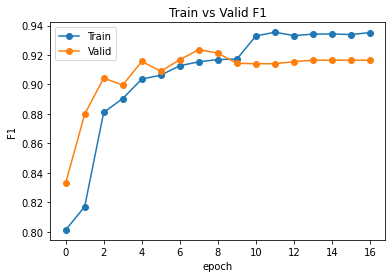

In [91]:
# freeze inception seed 7 1e-3 maxpool drop 0.2
show_graph(train_f1_list, val_f1_list, epoch_list)

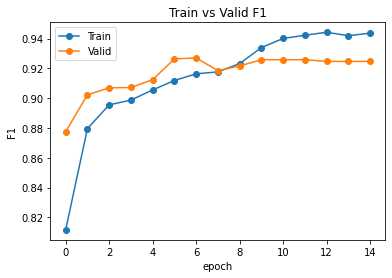

In [91]:
# freeze inception seed 84 1e-3 maxpool drop 0.2
show_graph(train_f1_list, val_f1_list, epoch_list)

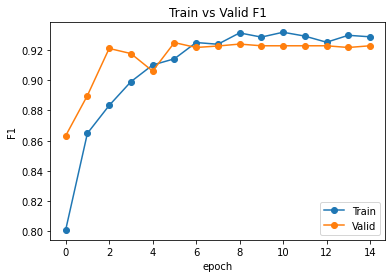

In [91]:
# freeze inception seed 66 1e-3 maxpool drop 0.2
show_graph(train_f1_list, val_f1_list, epoch_list)

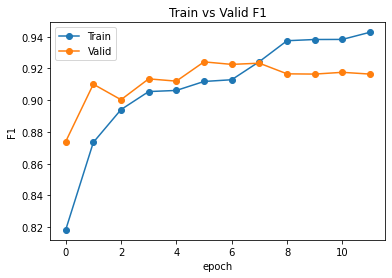

In [90]:
# freeze inception seed 25 1e-3 maxpool
show_graph(train_f1_list, val_f1_list, epoch_list)

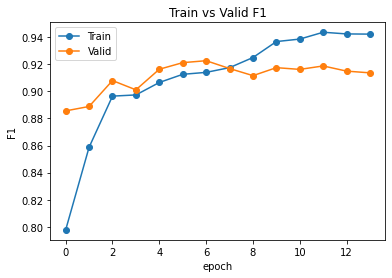

In [109]:
# freeze inception seed 84 1e-3
show_graph(train_f1_list, val_f1_list, epoch_list)

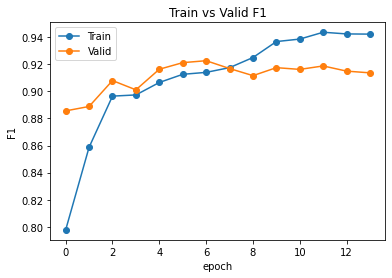

In [100]:
# freeze inception seed 84 1e-3
show_graph(train_f1_list, val_f1_list, epoch_list)

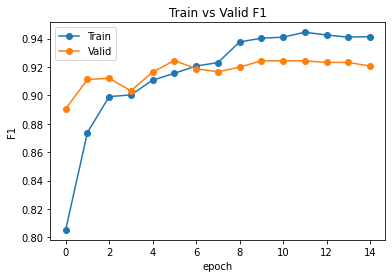

In [88]:
# freeze inception seed 84 1e-3
show_graph(train_f1_list, val_f1_list, epoch_list)

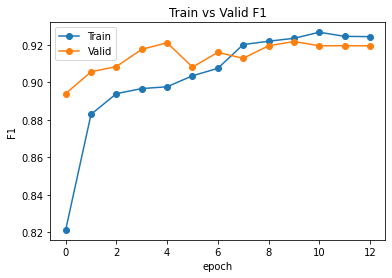

In [96]:
# freeze inception seed 84
show_graph(train_f1_list, val_f1_list, epoch_list)

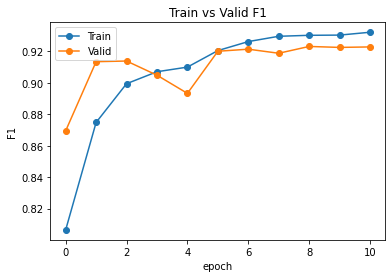

In [88]:
# freeze inception seed 25 1e-3
show_graph(train_f1_list, val_f1_list, epoch_list)

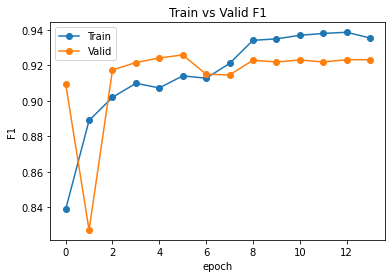

In [85]:
# freeze inception 66
show_graph(train_f1_list, val_f1_list, epoch_list)

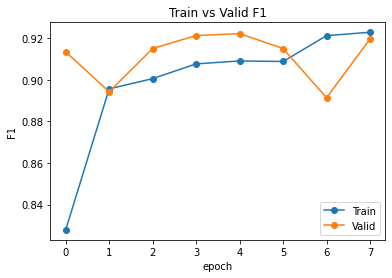

In [80]:
# freeze inception
show_graph(train_f1_list, val_f1_list, epoch_list)

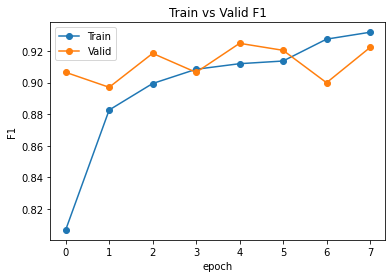

In [84]:
# freeze inception
show_graph(train_f1_list, val_f1_list, epoch_list)

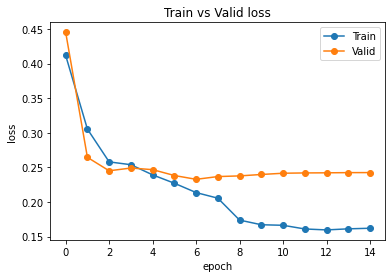

In [93]:
# freeze inception seed 84 1e-3 maxpool drop 0.5
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

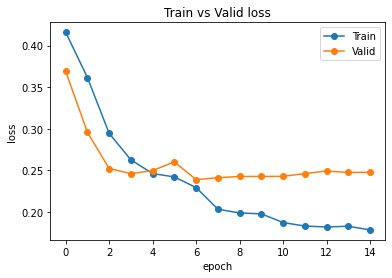

In [92]:
# freeze inception seed 0 1e-3 maxpool drop 0.2
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

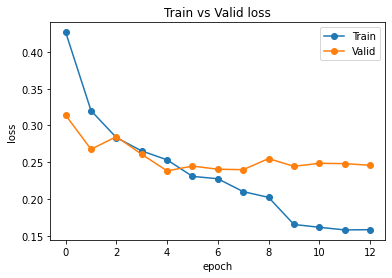

In [91]:
# freeze inception seed 25 1e-3 maxpool drop 0.2
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

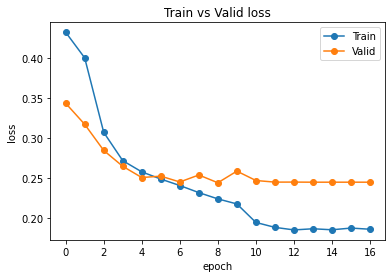

In [92]:
# freeze inception seed 7 1e-3 maxpool drop 0.2
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

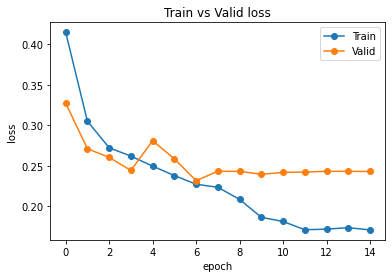

In [92]:
# freeze inception seed 84 1e-3 maxpool drop 0.2
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

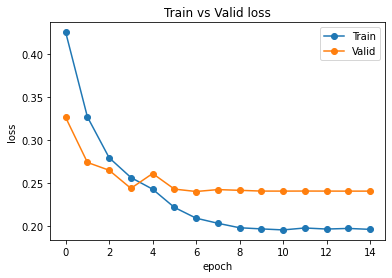

In [92]:
# freeze inception seed 66 1e-3 maxpool drop 0.2
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

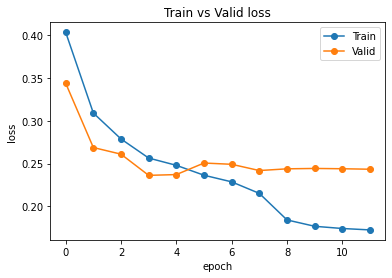

In [91]:
# freeze inception seed 25 1e-3 maxpool
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

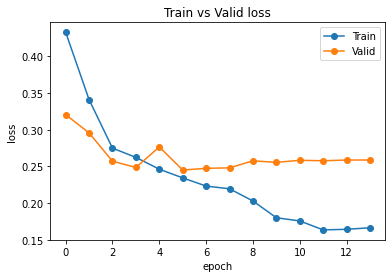

In [110]:
# freeze inception seed 84 1e-3
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

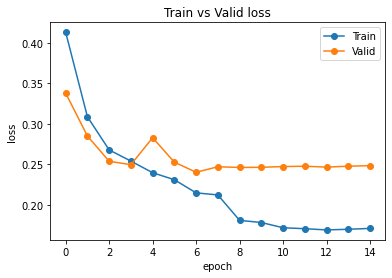

In [89]:
# freeze inception seed 84 1e-3
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

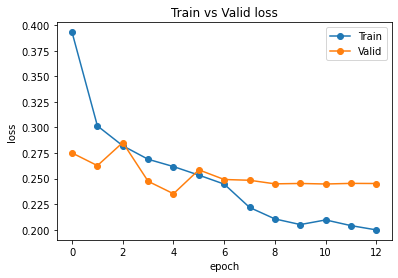

In [97]:
# freeze inception seed 84
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

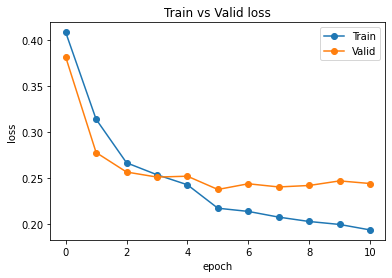

In [89]:
# freeze inception 25 1e-3
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

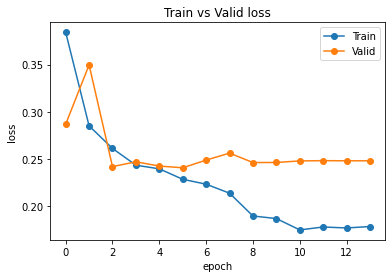

In [86]:
# freeze inception 66
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

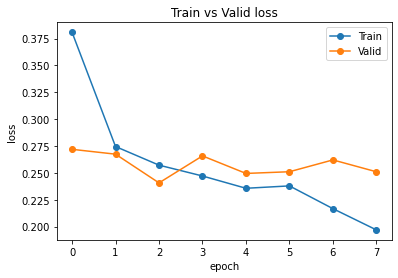

In [81]:
# freeze inception
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

In [78]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [95]:
import gc
del model 
gc.collect()

50

In [96]:
torch.cuda.empty_cache()

In [97]:
PATH = "my_checkpoint_attention_seed_66_1e-3.pth.tar"
checkpoint = torch.load(PATH, map_location=device)
model = Concatmodal()
model.load_state_dict(checkpoint['state_dict'])
model.to(device)
print(checkpoint['epoch'])

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


10


In [94]:
# f1
pred, score_preds, true = testing(model, dm)

test               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91       302
         1.0       0.95      0.97      0.96       695

    accuracy                           0.94       997
   macro avg       0.94      0.93      0.93       997
weighted avg       0.94      0.94      0.94       997

test_ac 0.9438314944834504
Confusion [[268  34]
 [ 22 673]]
Macro_f1 0.9327312333731734


In [98]:
# loss
pred, score_preds, true = testing(model, dm)

test               precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       302
         1.0       0.95      0.96      0.96       695

    accuracy                           0.94       997
   macro avg       0.93      0.92      0.93       997
weighted avg       0.94      0.94      0.94       997

test_ac 0.9378134403209629
Confusion [[266  36]
 [ 26 669]]
Macro_f1 0.9256685906685906


In [82]:
pred, score_preds, true = testing(model, dm)

test               precision    recall  f1-score   support

         0.0       0.94      0.89      0.92       302
         1.0       0.95      0.98      0.97       695

    accuracy                           0.95       997
   macro avg       0.95      0.94      0.94       997
weighted avg       0.95      0.95      0.95       997

test_ac 0.9518555667001003
Confusion [[270  32]
 [ 16 679]]
Macro_f1 0.9421139721891603


In [150]:
t = dm.test_data.reset_index(drop=True)

In [151]:
t

index     RevId    UserId    ResId  \
0     4077   2521334  13201293   653281   
1     6448   2573475  14562049   890498   
2     4054   2895371  13967176   757432   
3     4280   3675043  15348110   649499   
4     8947   6279731   1516967   791983   
..     ...       ...       ...      ...   
992   9729   3320053   9763313   954348   
993   1610   2055552  11034818   312332   
994   3757   7626093  15768703   935465   
995   3288  13642297  23340870  1084759   
996   3646   2523237    198889   889382   

                                               Comment  \
0    M√¨nh l√† kh√°ch quen c·ªßa Loki c·∫£ tr√™n Now v√† t·∫°i...   
1    M√¨nh ƒë√£ g·ªçi ƒë√¢y l√†  m·ªôt trong nh·ªØng qu√°n cafe ...   
2    M√¨nh ƒë√£ ƒÉn r·∫•t nhi·ªÅu l·∫ßn v√† ch·ªâ trung th√†nh v·ªõ...   
3    C·∫£ nh√† m√¨nh mua combo v√† th√™m 4 c√°nh g√† t·ªïng h...   
4    Th·∫•y v·∫Øng nh∆∞ng ƒë·ªì t∆∞∆°i n√™n m√¨nh ng·ªìi ƒÉn th·ª≠\n...   
..                                                 ...   
992  Check in lu√¥n cho n√≥ng h·ªïi p√† con ∆°i!ngon nh·∫•t...   
993  M√¨nh ƒë√£ ƒÉn ·ªü c√° lƒÉng th√πy linh, m√≥n ƒÉn r·∫•t ngo...   
994  Ngon su·∫•t x·∫Øc lu√¥n, 1 c·ªëc to √∫ ·ª•, ƒë√≥ng g√≥i c·∫©n...   
995  M√¨nh th·∫•y qu·∫£ng c√°o b√™n th√°nh ƒÉn. C√≥ c√°i m√¢m ·ªë...   
996  ƒê·ªì ngon, s·∫°ch s·∫Ω, gi√° ph·∫£i chƒÉng.\nMua v·ªÅ cu c...   

                                            image_urls  score  label  \
0    local1_folder-1/foody-loki-house-tao-pho-tra-s...    8.6      1   
1    local1_folder-1/foody-hoang-ha-bakery-coffee-5...   10.0      1   
2    local1_folder-1/foody-nem-nuong-nha-trang-co-h...    3.8      0   
3    local1_folder-1/foody-pizza-hut-thai-thinh-758...    4.6      0   
4    local1_folder-1/foody-xuan-seafood-hai-san-cac...    9.8      1   
..                                                 ...    ...    ...   
992  local1_folder-1/foody-chu-beo-mi-y-mi-tron-onl...   10.0      1   
993  local1_folder-1/foody-ca-lang-thuy-linh-846-63...   10.0      1   
994  local1_folder-1/foody-dong-duong-fruits-trai-c...    9.6      1   
995  local1_folder-1/foody-y-linh-oc-hai-san-duong-...   10.0      1   
996  local1_folder-1/foody-ca-phe-dinh-tra-hoa-qua-...    9.8      1   

                                    preprocess_comment  
0    m√¨nh l√† kh√°ch quen c·ªßa loki c·∫£ tr√™n now v√† t·∫°i...  
1    m√¨nh ƒë√£ g·ªçi ƒë√¢y l√† m·ªôt trong nh·ªØng qu√°n cafe ƒë...  
2    m√¨nh ƒë√£ ƒÉn r·∫•t nhi·ªÅu l·∫ßn v√† ch·ªâ trung_th√†nh v·ªõ...  
3    c·∫£ nh√† m√¨nh mua combo v√† th√™m 4 c√°nh_g√† t·ªïng h...  
4    th·∫•y v·∫Øng nh∆∞ng ƒë·ªì t∆∞∆°i n√™n m√¨nh ng·ªìi ƒÉn th·ª≠ n...  
..                                                 ...  
992  check in lu√¥n cho n√≥ng_h·ªïi p√† con ∆°i ngon nh·∫•t...  
993  m√¨nh ƒë√£ ƒÉn_·ªü c√°_lƒÉng thu·ª≥ linh m√≥n ƒÉn r·∫•t ngon...  
994  ngon su·∫•t x·∫Øc lu√¥n 1 c·ªëc to √∫_·ª• ƒë√≥ng_g√≥i c·∫©n_t...  
995  m√¨nh th·∫•y qu·∫£ng_c√°o b√™n th√°nh ƒÉn c√≥ c√°i m√¢m ·ªëc...  
996  ƒë·ªì ngon s·∫°ch_s·∫Ω gi√° ph·∫£i_chƒÉng mua v·ªÅ cu con 2...  

[997 rows x 9 columns]

In [152]:
print(t.iloc[983])
t.iloc[983]['image_urls']

index                                                              4489
RevId                                                           2003443
UserId                                                          8308405
ResId                                                            629323
Comment               Em ƒÉn b√°nh tr·ª©ng g√† non kh√° nhi·ªÅu n∆°i nh∆∞ng n√≥...
image_urls            local1_folder-1/foody-anh-bros-banh-trung-ga-n...
score                                                               5.0
label                                                                 0
preprocess_comment    em ƒÉn b√°nh tr·ª©ng g√† non kh√° nhi·ªÅu n∆°i nh∆∞ng n√≥...
Name: 983, dtype: object


'local1_folder-1/foody-anh-bros-banh-trung-ga-non-ho-dac-di-821-636586603608966164.jpg,local1_folder-1/foody-anh-bros-banh-trung-ga-non-ho-dac-di-605-636586603590047014.jpg,local1_folder-1/foody-anh-bros-banh-trung-ga-non-ho-dac-di-465-636586603560825989.jpg'

In [153]:
# pred

In [154]:
t['pred'] = pred
t
# wrong = t[t['pred'] != t['label']]

index     RevId    UserId    ResId  \
0     4077   2521334  13201293   653281   
1     6448   2573475  14562049   890498   
2     4054   2895371  13967176   757432   
3     4280   3675043  15348110   649499   
4     8947   6279731   1516967   791983   
..     ...       ...       ...      ...   
992   9729   3320053   9763313   954348   
993   1610   2055552  11034818   312332   
994   3757   7626093  15768703   935465   
995   3288  13642297  23340870  1084759   
996   3646   2523237    198889   889382   

                                               Comment  \
0    M√¨nh l√† kh√°ch quen c·ªßa Loki c·∫£ tr√™n Now v√† t·∫°i...   
1    M√¨nh ƒë√£ g·ªçi ƒë√¢y l√†  m·ªôt trong nh·ªØng qu√°n cafe ...   
2    M√¨nh ƒë√£ ƒÉn r·∫•t nhi·ªÅu l·∫ßn v√† ch·ªâ trung th√†nh v·ªõ...   
3    C·∫£ nh√† m√¨nh mua combo v√† th√™m 4 c√°nh g√† t·ªïng h...   
4    Th·∫•y v·∫Øng nh∆∞ng ƒë·ªì t∆∞∆°i n√™n m√¨nh ng·ªìi ƒÉn th·ª≠\n...   
..                                                 ...   
992  Check in lu√¥n cho n√≥ng h·ªïi p√† con ∆°i!ngon nh·∫•t...   
993  M√¨nh ƒë√£ ƒÉn ·ªü c√° lƒÉng th√πy linh, m√≥n ƒÉn r·∫•t ngo...   
994  Ngon su·∫•t x·∫Øc lu√¥n, 1 c·ªëc to √∫ ·ª•, ƒë√≥ng g√≥i c·∫©n...   
995  M√¨nh th·∫•y qu·∫£ng c√°o b√™n th√°nh ƒÉn. C√≥ c√°i m√¢m ·ªë...   
996  ƒê·ªì ngon, s·∫°ch s·∫Ω, gi√° ph·∫£i chƒÉng.\nMua v·ªÅ cu c...   

                                            image_urls  score  label  \
0    local1_folder-1/foody-loki-house-tao-pho-tra-s...    8.6      1   
1    local1_folder-1/foody-hoang-ha-bakery-coffee-5...   10.0      1   
2    local1_folder-1/foody-nem-nuong-nha-trang-co-h...    3.8      0   
3    local1_folder-1/foody-pizza-hut-thai-thinh-758...    4.6      0   
4    local1_folder-1/foody-xuan-seafood-hai-san-cac...    9.8      1   
..                                                 ...    ...    ...   
992  local1_folder-1/foody-chu-beo-mi-y-mi-tron-onl...   10.0      1   
993  local1_folder-1/foody-ca-lang-thuy-linh-846-63...   10.0      1   
994  local1_folder-1/foody-dong-duong-fruits-trai-c...    9.6      1   
995  local1_folder-1/foody-y-linh-oc-hai-san-duong-...   10.0      1   
996  local1_folder-1/foody-ca-phe-dinh-tra-hoa-qua-...    9.8      1   

                                    preprocess_comment  pred  
0    m√¨nh l√† kh√°ch quen c·ªßa loki c·∫£ tr√™n now v√† t·∫°i...   1.0  
1    m√¨nh ƒë√£ g·ªçi ƒë√¢y l√† m·ªôt trong nh·ªØng qu√°n cafe ƒë...   1.0  
2    m√¨nh ƒë√£ ƒÉn r·∫•t nhi·ªÅu l·∫ßn v√† ch·ªâ trung_th√†nh v·ªõ...   0.0  
3    c·∫£ nh√† m√¨nh mua combo v√† th√™m 4 c√°nh_g√† t·ªïng h...   0.0  
4    th·∫•y v·∫Øng nh∆∞ng ƒë·ªì t∆∞∆°i n√™n m√¨nh ng·ªìi ƒÉn th·ª≠ n...   1.0  
..                                                 ...   ...  
992  check in lu√¥n cho n√≥ng_h·ªïi p√† con ∆°i ngon nh·∫•t...   1.0  
993  m√¨nh ƒë√£ ƒÉn_·ªü c√°_lƒÉng thu·ª≥ linh m√≥n ƒÉn r·∫•t ngon...   1.0  
994  ngon su·∫•t x·∫Øc lu√¥n 1 c·ªëc to √∫_·ª• ƒë√≥ng_g√≥i c·∫©n_t...   1.0  
995  m√¨nh th·∫•y qu·∫£ng_c√°o b√™n th√°nh ƒÉn c√≥ c√°i m√¢m ·ªëc...   1.0  
996  ƒë·ªì ngon s·∫°ch_s·∫Ω gi√° ph·∫£i_chƒÉng mua v·ªÅ cu con 2...   1.0  

[997 rows x 10 columns]

In [161]:
t[(t['score'] > 4) & (t['label'] == 0)][:20]

index    RevId    UserId   ResId  \
3     4280  3675043  15348110  649499   
18    9212  2553642   8793345  231313   
29    7195  4089587  12492123  697151   
40    7395  2541177  10920705   11257   
46    7147  4607681   2235098  735275   
47    4988  2954205  11361393  741991   
62    3133  2003104   9900768  220650   
68    9013  2789397  15711619  799242   
81    1944  3723207  11743161  911232   
122   4660  2511973  13713747  168658   
126   4386  3255188  12608864  893801   
137   4177  5934166   9598960  134842   
147   9193  2476930  11909929  800995   
164   6310  2923167    301482  678808   
168   3195  3241783   2236236  960880   
178   5068  4229402   8369281  977566   
183   6261   463883   1118655  144167   
198   6713   890577    870114   50806   
208   3418  2531499   9963980  729363   
221   9077  2762152   2265226   49692   

                                               Comment  \
3    C·∫£ nh√† m√¨nh mua combo v√† th√™m 4 c√°nh g√† t·ªïng h...   
18   N·∫øu ai bi·∫øt chuy·ªán c·ªßa c√¥ ch·∫Øc ch·∫Øn ch·∫£ bao gi...   
29   ƒê·∫∑t h∆°n ch·ª•c l·∫ßn c·ªßa qu√°n r·ªìi , ch∆∞a l·∫ßn n√†o t...   
40   ƒÇn v√†i l·∫ßn c≈©ng th·∫•y t·∫°m ƒëc. ƒê·∫øn htrc ·ªëm ƒë·∫∑t s...   
46   M·ªõi nh√¨n th√¨ m√¨nh th·∫•y ƒë∆∞·ª£c b√°nh h∆°i x·∫πp m·ªôt c...   
47   ƒÇn ch√°n kh√¥ng th·ªÉ t·∫£ lu√¥n. M√¨nh ƒë·∫∑t giao h√†ng ...   
62   B·∫°ch tu·ªôc √≠t v√† ko h·ªÅ t∆∞∆°i. \n169k n·ªìi tu·ªôc, 1...   
68   ƒÇn dc, h∆°i √≠t rau, c√≥ th√™m ƒëu ƒë·ªß b√†o s·ª£i v·ªõi s...   
81   R√µ r√†ng m√¨nh ƒë·∫∑t 1 c·ªëc 50% ƒë∆∞·ªùng l√† ƒë∆∞·ªùng n√¢u ...   
122  M√¨nh ƒë√£ ƒÉn b√°nh m√¨ ·ªü ƒë√¢y r·∫•t nhi·ªÅu l·∫ßn r·∫•t h√†i...   
126  M√¨nh ƒë·∫∑t v·ªã soccola k hi·ªÉu sao giao sang x√∫c x...   
137  M√¨nh g·ªçi m·ª≥ v·∫±n th·∫Øn tr·ªôn v√¨ th√≠ch ƒÉn s·ªßi c·∫£o ...   
147  C·∫£ qu√°n 5 nh√¢n vi√™n, l√°c ƒë√°c v√†i kh√°ch m√† ƒë·ª£i ...   
164  H√¥m nay c√≥ vi·ªác qua Times, th·∫•y g·∫ßn n√™n qua ƒÉn...   
168  V√¨ ƒë√£ t·ª´ng u·ªëng 1 l·∫ßn c·ªßa c∆° s·ªü L√Ω Th∆∞·ªùng Ki·ªát...   
178  M√¨nh chia s·∫ª 1 ch√∫t:\n- V·ªÅ gi√° c·∫£: gi√° tr√™n No...   
183  Qu√°n ·ªü t·∫≠n tr√™n t·∫ßng 5 nh√¢n vi√™n √≠t. Kh√¥ng gia...   
198  M√¨nh ƒëi xem phim tr√™n t·∫ßng 6 xong ƒë√∫ng gi·ªù ƒÉn ...   
208                          G√† l√†m d·ªëi v√¢n. Ch∆∞a ch√≠n   
221  B√¨nh th∆∞·ªùng m√¨nh ƒë·∫øn ƒÉn tr·ª±c ti·∫øp t·∫°i ƒë√¢y th√¨ ...   

                                            image_urls  score  label  \
3    local1_folder-1/foody-pizza-hut-thai-thinh-758...    4.6      0   
18   local1_folder-1/foody-chao-suon-co-la-959-6368...    4.6      0   
29   local1_folder-1/foody-ha-anh-nem-nuong-nha-tra...    4.4      0   
40   local1_folder-1/foody-chao-gia-truyen-37-tran-...    4.6      0   
46   local1_folder-1/foody-bong-lan-trung-muoi-sieu...    4.8      0   
47   local1_folder-1/foody-v-cuisine-am-thuc-viet-5...    5.0      0   
62   local1_folder-1/foody-jeju-bbq-nuong-lau-686-6...    4.6      0   
68   local1_folder-1/foody-bamico-banh-mi-thit-nuon...    5.6      0   
81   local1_folder-1/foody-tiger-sugar-duong-nau-su...    5.0      0   
122  local1_folder-1/foody-one-one-banh-mi-doner-ke...    4.2      0   
126  local1_folder-1/foody-crepes-box-fastfood-drin...    5.8      0   
137  local1_folder-1/foody-mi-van-than-phung-gia-hu...    4.6      0   
147  local1_folder-1/foody-fruity-fact-ly-thuong-ki...    4.4      0   
164  local1_folder-1/foody-cocomi-com-nieu-lau-hong...    4.2      0   
168  local1_folder-1/foody-yihetang-tra-sua-nuong-l...    5.8      0   
178  local1_folder-1/foody-take-away-cafe-nuoc-ep-s...    5.0      0   
183  local1_folder-1/foody-snowee-gelato-drink-hoa-...    5.4      0   
198  local1_folder-1/foody-tokyo-yakiniku-buffet-la...    5.0      0   
208  local1_folder-1/foody-com-rang-ga-vu-ngoc-phan...    4.2      0   
221  local1_folder-1/foody-chan-ga-rang-muoi-785-63...    4.2      0   

                                    preprocess_comment  pred  
3    c·∫£ nh√† m√¨nh mua combo v√† th√™m 4 c√°nh_g√† t·ªïng h...

In [166]:
t.iloc[168]['preprocess_comment']
t.iloc[168]['image_urls']
# t.iloc[22]

'local1_folder-1/foody-yihetang-tra-sua-nuong-le-duan-955-637062286981334566.jpg,local1_folder-1/foody-yihetang-tra-sua-nuong-le-duan-964-637062286965239362.jpg,local1_folder-1/foody-yihetang-tra-sua-nuong-le-duan-583-637062286933205202.jpg,local1_folder-1/foody-yihetang-tra-sua-nuong-le-duan-377-637062286919297690.jpg'

In [89]:
print(t[t['index'] == 168].iloc[0]['image_urls'])

local1_folder-1/foody-banh-ga-ba-ganh-ta-quang-buu-618-637326898510667082.jpg,local1_folder-1/foody-banh-ga-ba-ganh-ta-quang-buu-927-637326898504477654.jpg


In [90]:
wrong = pd.read_csv('wrongtext.csv')
wrong

level_0  index     RevId    UserId    ResId  \
0        14   8299   1198264    904147   211755   
1        15   1071  13658853  23344199  1080315   
2        18   9212   2553642   8793345   231313   
3        37   3169   3395042   1470369   872192   
4        54   9318   2987990  15053398   879917   
..      ...    ...       ...       ...      ...   
58      950   1317   2336982   9440890     6128   
59      953   5755   4354468  18302878  1013381   
60      979   3755   2575020  10186511   280853   
61      987   6220   2972481  11012430   944671   
62      989   8821   2705487    757939   663609   

                                              Comment  \
0   QuaÃÅn ngon t∆∞ÃÄ ngoaÃÄi vaÃÄo khaÃÅ laÃÄ nhoÃâ, ƒëi v...   
1   Ngon l·∫Øm nha, m√¨nh th·∫•y nhi·ªÅu b·∫°n b·ªã ƒë·ªï nh√¢n r...   
2   N·∫øu ai bi·∫øt chuy·ªán c·ªßa c√¥ ch·∫Øc ch·∫Øn ch·∫£ bao gi...   
3                   Poke h∆°i ƒë·∫Øt. Healthy box ngon r·∫ª   
4      nh√¨n kh√° ƒë·∫πp m·∫Øt\nl√° l·ªët ƒÉn c·∫£m gi√°c ch∆∞a ch√≠n   
..                                                ...   
58  Combo deals kh√¥ng ƒë∆∞·ª£c √°p d·ª•ng sinh nh·∫≠t gi·∫£m ...   
59  M·ªôt th·ªùi qu√°n s·ªët s√¨nh s·ªãch tr√™n c√°c di·ªÖn ƒë√†n ...   
60  Do nh√† m√¨nh c≈©ng g·∫ßn v·ªõi qu√°n n√™n ƒë·ªì ƒÉn ship ƒë...   
61                       B·ªã nghi·ªÅn tr√† chanh Grey r·ªìi   
62  Nh√≥m m√¨nh ƒëi ƒÉn 10 kh√°ch nh√¢n d·ªãp sinh nh·∫≠t tr...   

                                           image_urls  Food_score_cmt  \
0   local1_folder-1/foody-bot-cakes-drinks-670-636...             9.0   
1   local1_folder-1/foody-pizza-dough-pizza-fast-f...            10.0   
2   local1_folder-1/foody-chao-suon-co-la-959-6368...             5.0   
3   local1_folder-1/foody-oh-poke-restaurant-608-6...             9.0   
4   local1_folder-1/foody-bong-bee-qua-vat-online-...             7.0   
..                                                ...             ...   
58  local1_folder-1/foody-pepperonis-restaurant-tr...             5.0   
59  local1_folder-1/foody-com-tho-bach-khoa-ta-qua...            10.0   
60  local1_folder-1/foody-tutafood-shop-online-588...             5.0   
61  local1_folder-1/foody-grey-tea-216-63701808633...             8.0   
62  local1_folder-1/foody-luk-lak-vietnamese-resta...             7.0   

    Services_score_cmt  Atmosphere_score_cmt  Position_score_cmt  \
0                  8.0                  10.0                 9.0   
1                 10.0                   9.0                10.0   
2                  5.0                   4.0                 4.0   
3                  8.0                   8.0                 9.0   
4                 10.0                  10.0                10.0   
..                 ...                   ...                 ...   
58                 1.0                   5.0                 5.0   
59                 9.0                   8.0                 9.0   
60                 5.0                   5.0                 5.0   
61                10.0                   8.0                 8.0   
62                 2.0                   6.0                 7.0   

    Price_score_cmt  score  label  \
0               8.0    8.8      1   
1              10.0    9.8      1   
2               5.0    4.6      0   
3               7.0    8.2      1   
4               8.0    9.0      1   
..              ...    ...    ...   
58              5.0    4.2      0   
59              9.0    9.0      1   
60              5.0    5.0      0   
61             10.0    8.8      1   
62              5.0    5.4      0   

                                   preprocess_comment  pred  
0   qu√°n ngon t·ª´ ngo√†i v√†o kh√° l√† nh·ªè ƒëi v√†o trong...   0.0  
1   ngon l·∫Øm nha m√¨nh th·∫•y nhi·ªÅu b·∫°n b·ªã ƒë·ªï nh√¢n ra...   0.0  
2   n·∫øu ai bi·∫øt chuy·ªán c·ªßa c√¥ ch·∫Øc_ch·∫Øn ch·∫£ bao_gi...   1.0  
3                    poke h∆°i ƒë·∫Øt healthy box ngon r·∫ª   0.0  
4       nh√¨n kh√° ƒë·∫πp_m·∫Øt l√°_l·ªët ƒÉn c·∫£m_gi√°c ch∆∞a ch√≠n   0.0  
..          

In [91]:
# wrong[:-10]

In [92]:
t = t.filter(items = wrong['level_0'], axis=0)
t

index     RevId    UserId    ResId  \
14    8299   1198264    904147   211755   
15    1071  13658853  23344199  1080315   
18    9212   2553642   8793345   231313   
37    3169   3395042   1470369   872192   
54    9318   2987990  15053398   879917   
..     ...       ...       ...      ...   
950   1317   2336982   9440890     6128   
953   5755   4354468  18302878  1013381   
979   3755   2575020  10186511   280853   
987   6220   2972481  11012430   944671   
989   8821   2705487    757939   663609   

                                               Comment  \
14   QuaÃÅn ngon t∆∞ÃÄ ngoaÃÄi vaÃÄo khaÃÅ laÃÄ nhoÃâ, ƒëi v...   
15   Ngon l·∫Øm nha, m√¨nh th·∫•y nhi·ªÅu b·∫°n b·ªã ƒë·ªï nh√¢n r...   
18   N·∫øu ai bi·∫øt chuy·ªán c·ªßa c√¥ ch·∫Øc ch·∫Øn ch·∫£ bao gi...   
37                   Poke h∆°i ƒë·∫Øt. Healthy box ngon r·∫ª   
54      nh√¨n kh√° ƒë·∫πp m·∫Øt\nl√° l·ªët ƒÉn c·∫£m gi√°c ch∆∞a ch√≠n   
..                                                 ...   
950  Combo deals kh√¥ng ƒë∆∞·ª£c √°p d·ª•ng sinh nh·∫≠t gi·∫£m ...   
953  M·ªôt th·ªùi qu√°n s·ªët s√¨nh s·ªãch tr√™n c√°c di·ªÖn ƒë√†n ...   
979  Do nh√† m√¨nh c≈©ng g·∫ßn v·ªõi qu√°n n√™n ƒë·ªì ƒÉn ship ƒë...   
987                       B·ªã nghi·ªÅn tr√† chanh Grey r·ªìi   
989  Nh√≥m m√¨nh ƒëi ƒÉn 10 kh√°ch nh√¢n d·ªãp sinh nh·∫≠t tr...   

                                            image_urls  score  label  \
14   local1_folder-1/foody-bot-cakes-drinks-670-636...    8.8      1   
15   local1_folder-1/foody-pizza-dough-pizza-fast-f...    9.8      1   
18   local1_folder-1/foody-chao-suon-co-la-959-6368...    4.6      0   
37   local1_folder-1/foody-oh-poke-restaurant-608-6...    8.2      1   
54   local1_folder-1/foody-bong-bee-qua-vat-online-...    9.0      1   
..                                                 ...    ...    ...   
950  local1_folder-1/foody-pepperonis-restaurant-tr...    4.2      0   
953  local1_folder-1/foody-com-tho-bach-khoa-ta-qua...    9.0      1   
979  local1_folder-1/foody-tutafood-shop-online-588...    5.0      0   
987  local1_folder-1/foody-grey-tea-216-63701808633...    8.8      1   
989  local1_folder-1/foody-luk-lak-vietnamese-resta...    5.4      0   

                                    preprocess_comment  pred  
14   qu√°n ngon t·ª´ ngo√†i v√†o kh√° l√† nh·ªè ƒëi v√†o trong...   0.0  
15   ngon l·∫Øm nha m√¨nh th·∫•y nhi·ªÅu b·∫°n b·ªã ƒë·ªï nh√¢n ra...   1.0  
18   n·∫øu ai bi·∫øt chuy·ªán c·ªßa c√¥ ch·∫Øc_ch·∫Øn ch·∫£ bao_gi...   1.0  
37                    poke h∆°i ƒë·∫Øt healthy box ngon r·∫ª   1.0  
54       nh√¨n kh√° ƒë·∫πp_m·∫Øt l√°_l·ªët ƒÉn c·∫£m_gi√°c ch∆∞a ch√≠n   0.0  
..                                                 ...   ...  
950  combo deals kh√¥ng ƒë∆∞·ª£c √°p_d·ª•ng sinh_nh·∫≠t gi·∫£m ...   1.0  
953  m·ªôt th·ªùi qu√°n s·ªët s√¨nh s·ªãch tr√™n c√°c di·ªÖn_ƒë√†n ...   0.0  
979  do nh√† m√¨nh c≈©ng g·∫ßn v·ªõi qu√°n n√™n ƒë·ªì_ƒÉn ship ƒë...   1.0  
987                       b·ªã nghi·ªÅn tr√† chanh grey r·ªìi   0.0  
989  nh√≥m m√¨nh ƒëi ƒÉn 10 kh√°ch nh√¢n_d·ªãp sinh_nh·∫≠t tr...   0.0  

[63 rows x 10 columns]

In [149]:
t.iloc[10]['preprocess_comment']
# t.iloc[20]['image_urls']
# t.iloc[22]

'ƒë√¢y l√† c∆°_s·ªü th·ª© 5 c·ªßa chu·ªói qu√°n ƒë·ªì n∆∞·ªõng 61 qu√°n s·ª© thi·∫øt_nghƒ© m·ªü th√™m c∆°_s·ªü 5 th√¨ chƒÉc c≈©ng ph·∫£i ch·∫•t_l∆∞·ª£ng l·∫Øm ch·ª© nh·ªâ th·∫•y c√≥ khuy·∫øn_m√£i h·∫øt th√°ng 9 l√† buffet 69k c·∫£ n∆∞·ªõng v√† l·∫©u v√†o t3 v√† t7 n√™n c≈©ng tin_t∆∞·ªüng v√† ƒëi th·ª≠ v√¨ th·∫•y r·∫ª n·ªØa v·ªã_tr√≠ ngay ƒë·∫ßu ƒëg th√¥i c≈©ng d·ªÖ nh√¨n th·∫•y ƒëo·∫°n n√†y c√≥ t·∫≠n m·∫•y qu√°n n∆∞·ªõng lu√¥n c≈©ng ƒë√¥ng kh√°ch ngag nhau n√™n chƒÉc km nh∆∞ n√†y ƒë·ªÉ h√∫t kh√°ch v√† c·∫°nh_tranh t∆∞·ªüng ƒë√¥ng n√™n g·ªçi ƒëi·ªán ƒë·∫∑t b√†n l√∫c 7h dc b√°o h ƒë·∫•y full r√πi ui kinh qu√° thui ch·ªãu_kh√≥ ƒë·∫∑t sag 6 30 eo ∆°i ƒë√©m th√¨ c√≤n b·∫°t_ng√†n b√†n nh√© nh∆∞ ·∫£nh t·ª´ l√∫c ƒÉn ƒë·∫øn l√∫c ƒÉn xong l√† 9h v·∫´n lu√¥n c√≤n b√†n ƒë·ªì_ƒÉn buffet t·ª± ch·ªçn t·ª± l·∫•y ƒë·ªì nh√¨n qa ch·∫£ bi·∫øt th·ªãt j ra th·ªãt j c·∫£ b√™n n∆∞·ªõng th√¨ c√≥ duy_nh·∫•t m·ªôt lo·∫°i l·ª£n ba ch·ªâ c√≥ s∆∞·ªùn s·ª•n th·ªãt s∆∞·ªùn gan l√≤ng_d·∫° d√†y th·ªãt s∆∞·ªùn th√¨ eo_

In [106]:
wrong[wrong['score']>=]

level_0  index     RevId    UserId    ResId  \
2        18   9212   2553642   8793345   231313   
5        68   9013   2789397  15711619   799242   
7       147   9193   2476930  11909929   800995   
10      239     80   1706791    535157   692942   
12      260   8930   1790742   2099145    93120   
14      282   9573    993666   1809485    14926   
20      357   2919   1781141   9549992   646226   
22      421   8962   2023938  11002262    11924   
25      465   3899    801608    532849    24934   
28      549   4525   4400452  19734076   688601   
32      597   7412   3319474  17797793   936717   
33      601   7653   2398208   1395483   640729   
37      655   9233   1054206    964479    26899   
38      661   5316   7453659  12222880   201722   
40      692   5519   3146406  12762060   720385   
42      728   5203   2284299  12403959   317297   
44      754   9264   2260590   1716416    92239   
46      783   7296   3839228   1101919   981195   
48      817   4992   1583159   8555555   657863   
49      818   5881  10208323  13083741  1025457   
50      833   1432   2593694   8339192   712541   
51      837    559   3071590   2291414   924630   
54      906   4985   1526721   9157641   285537   
56      921   1694   2622231   1309602   908207   
58      950   1317   2336982   9440890     6128   
60      979   3755   2575020  10186511   280853   
62      989   8821   2705487    757939   663609   

                                              Comment  \
2   N·∫øu ai bi·∫øt chuy·ªán c·ªßa c√¥ ch·∫Øc ch·∫Øn ch·∫£ bao gi...   
5   ƒÇn dc, h∆°i √≠t rau, c√≥ th√™m ƒëu ƒë·ªß b√†o s·ª£i v·ªõi s...   
7   C·∫£ qu√°n 5 nh√¢n vi√™n, l√°c ƒë√°c v√†i kh√°ch m√† ƒë·ª£i ...   
10  ƒê√¢y l√† c∆° s·ªü th·ª© 5 c·ªßa chu·ªói qu√°n ƒë·ªì n∆∞·ªõng 61 ...   
12  Th·∫•y m·∫•y ch·ªã em oder ƒÉn r·ªìi post h√¨nh face l√†m...   
14  Qu√°n cafe n√†y n·∫±m ngay g·∫ßn cafe NƒÉng kh√° n·ªïi t...   
20  Cu·ªëi tu·∫ßn trc ra goky ng·ªìi u·ªëng th·ª≠ nh∆∞ng qu√™n...   
22  ƒêi·ªÉm c·ªông: Qu√°n s·∫°ch s·∫Ω, c√≥ x·ª≠ l√Ω ch·ªëng ·ªìn tr√™...   
25  Qu√°n v·ªâa h√®, ko s·∫°ch s·∫Ω qu√° c≈©ng ko m·∫•t v·ªá sin...   
28  H√¥m nay l·∫ßn n kh√°c m·ªçi h√¥m l√† h√¥m nay g·ªçi ƒë·ªì ƒÉ...   
32  T√¨nh c·ªù ƒëi ngang qua m·ªõi bi·∫øt L·∫°c Trung c√≥ Toc...   
33  M·ªôt tu·∫ßn ng·ªìi ·ªü Dingtea L·∫°c Trung c≈©ng ph·∫£i v√†...   
37  Qu√°n ph·ªü n√†y c≈©ng ƒë√£ kh√° l√¢u ƒë·ªùi r·ªìi. Ch·ªß qu√°n...   
38  C√°ch ƒë√¢y 2 nƒÉm m√¨nh ƒÉn kh√° nhi·ªÅu ·ªü ƒë√¢y. Th·∫•y n...   
40  Th√®m tr√† ƒë√†o v√†o highland vƒÉn qu√°n oder c·ªëc tr...   
42  M√¨nh ƒë·∫øn ƒë√¢y ƒÉn ƒë√¢y l√† l·∫ßn th·ª© hai r·ªìi v√† c√≥ t...   
44  M√¨nh 2 ng∆∞·ªùi ƒÉn 1 cua v√† 1 ƒëƒ©a s√≤ ƒë√¢y ·∫°. C·∫£m n...   
46  M√¨nh ƒÉn ·ªü ƒë√¢y th·∫•y ngon h∆°n c∆° s∆° . ƒÇn ·ªü t·∫° qu...   
48  Nghe gi·ªõi thi·ªáu tr√™n instagram c·ªßa foodyhanoi ...   
49  Tr·∫£i nghi·ªám Yatang Taiwan Tr·∫ßn ƒê·∫°i Nghƒ©a üëèüèªüëèüèªüëè...   
50  M√¨nh c√≥ mua voucher 125k cho 2 su·∫•t g√† nh∆∞ h√¨n...   
51  M√¨nh v·ª´a ƒë·∫∑t ship ƒë·ªì v·ªÅ nh√† ƒÉn, m·∫∑c d√π th·ªùi gi...   
54  Cafe ƒë∆∞·ª£c, c√°c lo·∫°i sinh t·ªë t∆∞∆°i v√† c√≥ m√≥n th·∫°...   
56  Nh√† h√†ng c√≥ v·ªã tr√≠ t·∫ßng 4 TTTM, h∆°i b·∫•t ti·ªán c...   
58  Combo deals kh√¥ng ƒë∆∞·ª£c √°p d·ª•ng sinh nh·∫≠t gi·∫£m ...   
60  Do nh√† m√¨nh c≈©ng g·∫ßn v·ªõi qu√°n n√™n ƒë·ªì ƒÉn ship ƒë...   
62  Nh√≥m m√¨nh ƒëi ƒÉn 10 kh√°ch nh√¢n d·ªãp sinh nh·∫≠t tr...   

                                           image_urls  Food_score_cmt  \
2   local1_folder-1/foody-chao-suon-co-la-959-6368...             5.0   
5   local1_folder-1/foody-bamico-banh-mi-thit-nuon...             6.0   
7   local1_folder-1/foody-fruity-fact-ly-thuong-ki...             4.0   
10  local1_folder-1/foody-do-nuong-692942-582-6364...             2.0   
12  local1_folder-1/foody-paris-kitchen-hai-ba-tru...             5.0   
14  local1_folder-1/foody-lam-cafe-nguyen-huu-huan...             6.0   
20  local1_folder-1/foody-goky-tea-coffee-juice-o-...             2.0   
22  local1_fol

In [135]:
# t[t['label']==0]

In [146]:
wrong.iloc[10]['image_urls']

'local1_folder-1/foody-do-nuong-692942-582-636428430487013178.jpg,local1_folder-1/foody-do-nuong-692942-807-636428430481231491.jpg,local1_folder-1/foody-do-nuong-692942-722-636428430472949581.jpg,local1_folder-1/foody-do-nuong-692942-394-636428430472168270.jpg,local1_folder-1/foody-do-nuong-692942-314-636428430470918177.jpg,local1_folder-1/foody-do-nuong-692942-826-636428430464667685.jpg,local1_folder-1/foody-do-nuong-692942-759-636428430436373301.jpg,local1_folder-1/foody-do-nuong-692942-378-636428430436998330.jpg,local1_folder-1/foody-do-nuong-692942-626-636428430434966941.jpg,local1_folder-1/foody-do-nuong-692942-166-636428430434498154.jpg'

In [213]:
data_df[data_df['score'] < 6][:140]

index    RevId    UserId    ResId  \
0        0  3648046   8920424   965165   
3        3  4256913  11400976   965165   
4        4  4246644    525112   965165   
8        8  5818974  16441515   968327   
9        9  2249624   1301558   187189   
..     ...      ...       ...      ...   
444    444  3043252  14093275   312433   
445    445  8367003  21562334  1005102   
447    447  1001562    844369   177118   
448    448  1427837   8531325   177118   
452    452  3613467   1712536   781842   

                                               Comment  \
0    ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...   
3    Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...   
4    D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...   
8                             B·∫°n n√†o ƒë·∫∑t n√™n c·∫©n th·∫≠n   
9    Tr∆∞·ªõc m√¨nh r·∫•t hay ƒÉn ·ªü qu√°n v√¨ ƒë·ªì ngon v√† gi√°...   
..                                                 ...   
444  ƒê√∫ng l√† gi·ªèi seeding. G·ªçi qua grab 2 su·∫•t mi·∫øn...   
445  S·ªØa t∆∞∆°i u·ªëng ch√°n, nham nh·ªü, nh·∫°t nh∆∞ u·ªëng s·ªØ...   
447  Kh√¥ng gian kh√° ƒë·∫πp m√†u s·∫Øc trang tr√≠ b·∫Øt m·∫Øt, ...   
448  Th·ªùi sinh vi√™n m√¨nh v√†o ƒë√¢y kh√° nhi·ªÅu, c√≥ m·ªôt ...   
452  C·ªëc th√¨ pha qu√° nh·∫°t\nC·ªëc th√¨ ƒë√£ note l√† pha √≠...   

                                            image_urls  score  label  \
0    local1_folder-1/foody-doi-sun-pate-shop-online...    5.8      0   
3    local1_folder-1/foody-doi-sun-pate-shop-online...    4.6      0   
4    local1_folder-1/foody-doi-sun-pate-shop-online...    1.0      0   
8    local1_folder-1/foody-com-ga-123-nguyen-khang-...    1.0      0   
9    local1_folder-1/foody-chao-ngon-ha-noi-115-636...    5.4      0   
..                                                 ...    ...    ...   
444  local1_folder-1/foody-huong-binh-luon-xu-nghe-...    1.4      0   
445  local1_folder-1/foody-royaltea-mai-dich-541-63...    1.0      0   
447  local1_folder-1/foody-dynamic-cafe-xuan-thuy-4...    5.0      0   
448  local1_folder-1/foody-dynamic-cafe-xuan-thuy-5...    1.8      0   
452  local1_folder-1/foody-tra-sua-mixue-tran-quoc-...    3.4      0   

                                    preprocess_comment  
0    ƒë·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p_d...  
3    kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7 9 lu√¥n ƒë·∫∑t b√°nh...  
4    d·ªìi s·ª•n b√© t·∫πo gi√° qu√° cao so v·ªõi c√°c qu√°n kh√°...  
8                             b·∫°n n√†o ƒë·∫∑t n√™n c·∫©n_th·∫≠n  
9    tr∆∞·ªõc m√¨nh r·∫•t hay ƒÉn_·ªü qu√°n v√¨ ƒë·ªì ngon v√† gi√°...  
..                                                 ...  
444  ƒë√∫ng l√† gi·ªèi seeding g·ªçi qua grab 2 su·∫•t mi·∫øn ...  
445  s·ªØa_t∆∞∆°i u·ªëng ch√°n nham_nh·ªü nh·∫°t nh∆∞ u·ªëng s·ªØa ...  
447  kh√¥ng_gian kh√° ƒë·∫πp m√†u_s·∫Øc trang_tr√≠ b·∫Øt_m·∫Øt ƒë...  
448  th·ªùi sinh_vi√™n m√¨nh v√†o ƒë√¢y kh√° nhi·ªÅu c√≥ m·ªôt_s...  
452  c·ªëc th√¨ pha qu√° nh·∫°t c·ªëc th√¨ ƒë√£ note l√† pha √≠t...  

[140 rows x 9 columns]

In [227]:
tex = 'ƒë·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d·∫´n qu√° m√¨nh mua v·ªÅ ship qua now r·∫•t nhanh v·∫´n n√≥ng ƒë√≥ng g√≥i c·∫©n th·∫≠n nh∆∞ng d·ªìi r√°n b·ªã ƒëen v√† chi·∫øc d·ªìi cu·ªëi c√πng ƒë∆∞·ª£c d√†i ƒë√∫ng b·∫±ng chi·∫øc l√° rau h√∫ng ƒë√≠nh k√®m ·∫£nh lu√¥n gi√° 13k cho 1 chi·∫øc d·ªìi ·∫° ƒëi·ªÉm c·ªông l√† n∆∞·ªõc ch·∫•m ngon b√°nh crep s·∫ßu ri√™ng kh√° th∆°m ng·∫≠y nh∆∞ng v·ªè b√°nh th√¨ kh√¥ ch·∫Øc k ƒë·∫∑t l·∫°i l·∫ßn sau lu√¥n'
pre = preprocess_text(tex)
pre

'ƒë·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p_d·∫´n qu√° m√¨nh mua v·ªÅ ship qua now r·∫•t nhanh v·∫´n n√≥ng ƒë√≥ng_g√≥i c·∫©n_th·∫≠n nh∆∞ng d·ªìi r√°n b·ªã ƒëen v√† chi·∫øc d·ªìi cu·ªëi_c√πng ƒë∆∞·ª£c d√†i ƒë√∫ng b·∫±ng chi·∫øc l√° rau h√∫ng ƒë√≠nh k√®m ·∫£nh lu√¥n gi√° 13k cho 1 chi·∫øc d·ªìi ·∫° ƒëi·ªÉm c·ªông l√† n∆∞·ªõc_ch·∫•m ngon b√°nh crep s·∫ßu_ri√™ng kh√° th∆°m ng·∫≠y nh∆∞ng v·ªè b√°nh th√¨ kh√¥ ch·∫Øc k ƒë·∫∑t l·∫°i l·∫ßn sau lu√¥n'

In [225]:
print(data_df.iloc[3]['preprocess_comment'])
data_df.iloc[3]['image_urls']

kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7 9 lu√¥n ƒë·∫∑t b√°nh crep s·∫ßu_ri√™ng v·ªÅ t√°_ho·∫£ crep s·∫ßu m√† kh√¥ng c√≥ n·ªïi m·ªôt mi·∫øng s·∫ßu n√†o v·ªè d√†y 7749 l·∫ßn ch·∫Øc l√† c·∫°nh ƒë·∫øn gi√†


'local1_folder-1/foody-doi-sun-pate-shop-online-498-637191784645620118.jpg,local1_folder-1/foody-doi-sun-pate-shop-online-485-637191784645463849.jpg,local1_folder-1/foody-doi-sun-pate-shop-online-980-637191784642963618.jpg'

local1_folder-1/foody-doi-sun-pate-shop-online-980-637191784642963618.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x1067 at 0x7FA377F10F10>
(1067, 800, 3)


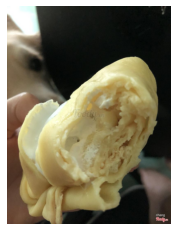

In [231]:
img_path = 'local1_folder-1/foody-doi-sun-pate-shop-online-980-637191784642963618.jpg'
print(img_path)
img = Image.open(data_zip.open(img_path))
img.save('VD4.jpg')
print(img)
print(np.asarray(img).shape)
plt.axis('off')
plt.imshow(img)

## optimizer = torch.optim.Adam([
        {'params': model.BERT.lstm.parameters()},  
        {'params': model.incept.flat.parameters()}, 
        {'params': model.incept.avgpool.parameters()},  
        {'params': model.dense.parameters()},       
        {'params': model.cl.parameters()},       
        {'params': model.BERT.PhoBERT.parameters(), 'lr': 1e-5},
        {'params': model.incept.incept.parameters(), 'lr': 1e-5}
    ], lr=1e-3)
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
import cv2
def plot(model):
  model.eval()
  test_preds = torch.tensor([], device=device)
  test_labels = torch.tensor([], device = device)
  test_text = []
  test_img = []

  soft_m = nn.Softmax(dim=-1)
  with torch.no_grad():
    for i, (texts, images, labels) in enumerate(dm.test_dataloader()):
        labels = labels.to(device)

        outputs = model(images, texts)

        output_scores = soft_m(outputs)
        predictions = torch.argmax(output_scores, dim=-1)

        test_preds = torch.cat((test_preds, predictions), dim=0)
        test_labels = torch.cat((test_labels, labels), dim=0)
        for t in texts:
          test_text.append(t) 
        for i in images:
          test_img.append(i) 

    
    test_preds = test_preds.cpu().numpy()
    test_labels = test_labels.cpu().numpy()
  i = 1
  plt.figure(figsize=(40,40))
  print(len(test_labels))
  for image, actual_label, label, text in zip(test_img, test_labels, test_preds, test_text):

      if (actual_label == label):

        plt.subplot(4,4,i)
        i+=1
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = T.ToPILImage()(image).convert("RGB")
        plt.imshow(image)
        plt.axis('off')
        plt.title("Text: {}...\n Actual: {}\n Predicted: {}".format(text[:30], actual_label, label))
        # plt.xlabel(text)
      else:
        pass
      if (i==17):
        break;
  plt.savefig('res_freeze_af20epoch.png', bbox_inches='tight')
  plt.show()
  

plot(model)


In [98]:
torch.cuda.empty_cache()

In [96]:
!nvidia-smi

Fri Apr 22 09:11:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
| 66%   74C    P2   198W / 250W |  10884MiB / 11019MiB |     81%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
| 57%   